# Final Project 4
---

### Anggota kelompok :
1. PYTN-KS09-010 - Rizqi Meidianto Kresna Mukti
2. PYTN-KS09-018 - Rizke Fridayati
3. PYTN-KS09-024 - Robi Dwiputra Satria

**PYTN-KS-09**<br>
**Studi Independen - Kampus Merdeka**

## Daftar Isi

- Perkenalan
- Import Pustaka
- Data Loading
- Data Cleaning
- Eksplorasi Data
- Data Preprocessing
- Pendefinisian model
- Pelatihan model
- Evaluasi Model
- Model Inference
- Kesimpulan

---
# A. Perkenalan

## Latar Belakang

Proyek ini ditujukan untuk mengidentifikasi segmen yang berbeda pada pengguna yang ada, berdasarkan pola pengeluaran mereka serta interaksi sebelumnya dengan bank menggunakan algoritma Clustering dan memberikan rekomendasi kepada bank tentang cara memasarkan dan melayani pengguna ini dengan lebih baik.

Dataset ["Credit Card Dataset for Clustering"](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) yang diperoleh dari kaggle berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut yaitu:

1. `CUST_ID` - Identifikasi Pemegang Kartu Kredit (Kategoris)
2. `BALANCE` - Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. `BALANCE_FREQUENCY` - Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. `PURCHASES` - Jumlah pembelian yang dilakukan dari akun
5. `ONEOFF_PURCHASES` - Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. `INSTALLMENTS_PURCHASES` - Jumlah pembelian dilakukan secara angsuran
7. `CASH_ADVANCE` - Uang tunai di muka yang diberikan oleh pengguna
8. `PURCHASES_FREQUENCY` - Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. `ONEOFF_PURCHASES_FREQUENCY` - How sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. `PURCHASES_INSTALLMENTS_FREQUENCY` - Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. `CASH_ADVANCE_FREQUENCY` - Seberapa sering uang tunai di muka dibayarkan
12. `CASH_ADVANCE_TRX` - Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
13. `PURCHASES_TRX` - Jumlah transaksi pembelian yang dilakukan
14. `CREDIT_LIMIT` - Batas Kartu Kredit untuk pengguna
15. `PAYMENTS` - Jumlah Pembayaran yang dilakukan oleh pengguna
16. `MINIMUM_PAYMENTS` - Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. `PRC_FULL_PAYMENT` - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. `TENURE` - Jangka waktu layanan kartu kredit untuk pengguna

## Tujuan

Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:\
● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn\
● Mampu mempersiapkan data untuk digunakan dalam Clustering \
● Mampu mengimplementasikan Clustering pada data yang diberikan

---
# B. Import Pustaka

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from scipy.cluster.hierarchy import dendrogram, linkage     
from yellowbrick.model_selection import validation_curve
from yellowbrick.cluster import KElbowVisualizer

import pickle

---
# C. Data Loading

Mengimport dataset yang akan digunakan

In [2]:
df = pd.read_csv('dataset/CC GENERAL.csv')

Melihat 5 baris teratas dari dataset

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Melihat 5 baris terbawah dari dataset

In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


Melihat dimensi (baris, kolom) dataset

In [5]:
baris, kolom = df.shape
print(baris, 'baris')
print(kolom, 'kolom')

8950 baris
18 kolom


Dataset ini berisi 8950 baris serta 18 kolom. Baris mewakili informasi Kartu Kredit dari masing-masing pelanggan. Dapat ditemukan informasi yang lebih umum mengenai dataset menggunakan ___info function___ di bawah ini:

Melihat informasi tipe data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Interpretasi** :
- Berdasarkan informasi dataset, terdapat 3 tipe data berbeda pada kolom yaitu tipe float sebanyak 14, integer sebanyak 3 dan object sebanyak 1.
- Berdasarkan tipe data yang ada dalam kumpulan data ini, terlihat bahwa data tersebut bertipe numerik. Hal ini penting karena Algoritma Clustering memerlukan perhitungan **Euclidean Distance** dari setiap observasi terhadap centroid cluster, artinya hanya berlaku untuk data numerik.

In [7]:
# checking nunique and type per columns:
df_nunique = pd.DataFrame([[col , df[col].nunique(),df[col].dtypes] for col in df.columns],columns=['col','nunique','type'])
df_nunique

,col,nunique,type
0,CUST_ID,8950,object
1,BALANCE,8871,float64
2,BALANCE_FREQUENCY,43,float64
3,PURCHASES,6203,float64
4,ONEOFF_PURCHASES,4014,float64
5,INSTALLMENTS_PURCHASES,4452,float64
6,CASH_ADVANCE,4323,float64
7,PURCHASES_FREQUENCY,47,float64
8,ONEOFF_PURCHASES_FREQUENCY,47,float64
9,PURCHASES_INSTALLMENTS_FREQUENCY,47,float64


Melihat jumlah nilai unik untuk setiap atribut

In [8]:
for i in df.columns:
    print('Jumlah nilai unik untuk atribut {}: {}'.format(i, len(df[i].unique())))

Jumlah nilai unik untuk atribut CUST_ID: 8950
Jumlah nilai unik untuk atribut BALANCE: 8871
Jumlah nilai unik untuk atribut BALANCE_FREQUENCY: 43
Jumlah nilai unik untuk atribut PURCHASES: 6203
Jumlah nilai unik untuk atribut ONEOFF_PURCHASES: 4014
Jumlah nilai unik untuk atribut INSTALLMENTS_PURCHASES: 4452
Jumlah nilai unik untuk atribut CASH_ADVANCE: 4323
Jumlah nilai unik untuk atribut PURCHASES_FREQUENCY: 47
Jumlah nilai unik untuk atribut ONEOFF_PURCHASES_FREQUENCY: 47
Jumlah nilai unik untuk atribut PURCHASES_INSTALLMENTS_FREQUENCY: 47
Jumlah nilai unik untuk atribut CASH_ADVANCE_FREQUENCY: 54
Jumlah nilai unik untuk atribut CASH_ADVANCE_TRX: 65
Jumlah nilai unik untuk atribut PURCHASES_TRX: 173
Jumlah nilai unik untuk atribut CREDIT_LIMIT: 206
Jumlah nilai unik untuk atribut PAYMENTS: 8711
Jumlah nilai unik untuk atribut MINIMUM_PAYMENTS: 8637
Jumlah nilai unik untuk atribut PRC_FULL_PAYMENT: 47
Jumlah nilai unik untuk atribut TENURE: 7


In [9]:
df.describe(include='number')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Berdasarkan rangkuman deskripsi statistik tipe data numerik, terlihat bahwa sebagian besar fitur memiliki rata-rata yang jauh lebih besar daripada mediannya. Ini adalah tanda dari beberapa ___skewness___ (kecondongan) dalam kumpulan data.

---
# D. Data Cleaning

Seringkali dataset yang akan dianalisis terdapat noise di dalamnya, artinya mengandung error, nilai suatu atribut tidak benar, data duplikat, atau nilai outlier, yang menyimpang dari yang diharapkan. Jika hal ini terjadi, dapat mempengaruhi performa machine learning seperti ___K-Means Clustering___ dalam mengelompokan kumpulan data menjadi beberapa kelompok yang megakibatkan salah sasaran dalam pemasaran produk. Seperti disebutkan sebelumnya, nilai yang digunakan untuk clustering bertipe numerik. Maka, data harus berada pada skala dengan rata-rata dan varians yang relatif sama untuk setiap fitur.

Melakukan pengecekan duplikasi data

In [10]:
df[df.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Tidak terdapat duplikasi data

In [11]:
df.duplicated().sum()

0

Melihat deskripsi statistik tipe data kategorik

In [12]:
df.describe(exclude='number')

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


Menghapus `CUST_ID` karena setiap pelanggan memiliki nilai unik yang berbeda dan tidak diperlukan untuk analisis lebih lanjut

In [13]:
df.drop(columns='CUST_ID', inplace=True)

Melihat missing values

In [14]:
df[df.isna().any(axis=1)]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [15]:
count_missing = df.isnull().sum() 
percent_missing = round(df.isnull().sum()/len(df), 5) * 100
cols_missing = ['Count of Missing Values', 'Percent of Missing Values %']

missing_values_df = pd.concat([count_missing, percent_missing], axis=1)
missing_values_df.columns = cols_missing

missing_values_df

,Count of Missing Values,Percent of Missing Values %
BALANCE,0,0.000
BALANCE_FREQUENCY,0,0.000
PURCHASES,0,0.000
ONEOFF_PURCHASES,0,0.000
INSTALLMENTS_PURCHASES,0,0.000
CASH_ADVANCE,0,0.000
PURCHASES_FREQUENCY,0,0.000
ONEOFF_PURCHASES_FREQUENCY,0,0.000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000
CASH_ADVANCE_FREQUENCY,0,0.000


Terdapat 313 baris yang merupakan missing values pada kolom `MINIMUM_PAYMENTS` dan 1 missing values pada kolom `CREDIT_LIMIT`, maka akan dilakukan pengecekan distribusi data pada kedua kolom ini. 

Membuat suatu fungsi diagnostic_plot() untuk menampilkan distribusi data beserta outlier (data pencilan).

In [16]:
plt.rcParams['patch.linewidth'] = 2
plt.rcParams['patch.edgecolor'] = 'white'
colors = ['#0343DF', '#7E1E9C']
sns.set_palette(sns.color_palette(colors))
def diagnostic_plot(data, col, name):
    skew = ["Skewness : {}".format(round(df[col].skew(), 5), axis=0, bias=True)]
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=10, kde=True, alpha=0.5)
    plt.title('Histogram')
    plt.legend(labels=skew, prop={'size':14})
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title('Boxplot')
    
    plt.suptitle('Data Distribution for {}'.format(name))
    plt.show()

Melihat distribusi data dari fitur `CREDIT_LIMIT`

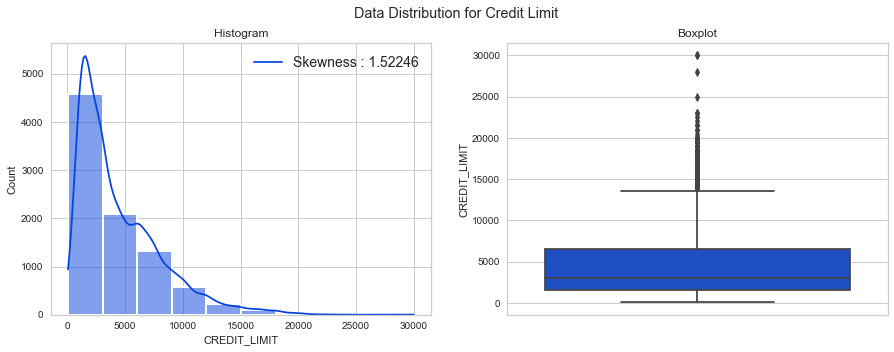

In [17]:
diagnostic_plot(df, 'CREDIT_LIMIT', 'Credit Limit')

Melihat distribusi data dari fitur `MINIMUM_PAYMENTS`

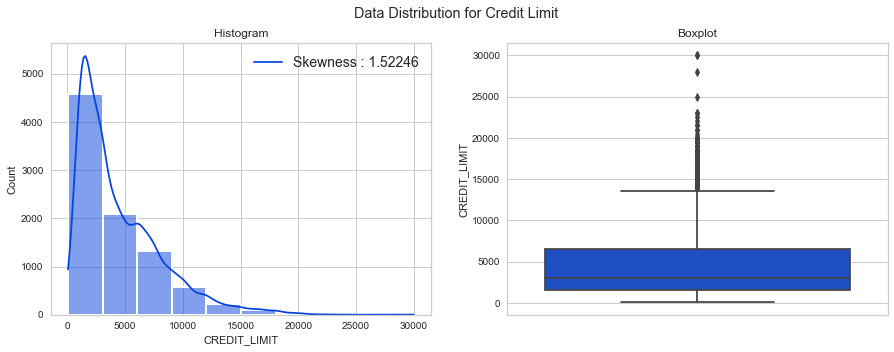

In [18]:
diagnostic_plot(df, 'CREDIT_LIMIT', 'Credit Limit')

**Analisis:**
- Fitur `CREDIT_LIMIT` hanya memiliki 0,01% nilai NaN (data null), artinya hanya terdapat 1 nilai yang hilang, maka akan dilakukan penghapusan baris pada nilai tersebut.
- Fitur `MINIMUM_PAYMENTS` memiliki 313 data null. Kekosongan tersebut dapat diatasi menggunakan median karena fitur pembayaran minimum memiliki distribusi data yang membentuk ___highly positively skewed___ (kemiringan tinggi) dengan nilai skewness 13.6228, jauh melebihi 1. Oleh karena itu, median dapat memberikan estimasi yang lebih baik jika dibandingkan dengan penggunaan nilai rata-rata untuk mengisi data null dalam kasus ini.

Menghapus baris yang memiliki missing value pada kolom `CREDIT_LIMIT`

In [19]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Menampilkan 3 baris teratas pada kolom `MINIMUM_PAYMENTS` yang memiliki missing value

In [20]:
df[df['MINIMUM_PAYMENTS'].isin([np.nan])].head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.0,NaN,0.0,12
45,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,NaN,0.0,12
47,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.0,NaN,0.0,12


Missing value pada kolom `MINIMUM_PAYMENTS` akan ditangani dengan imputasi median

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df[['MINIMUM_PAYMENTS']])
df['MINIMUM_PAYMENTS'] = imputer.transform(df[['MINIMUM_PAYMENTS']])

Memastikan kembali data null pada kolom `MINIMUM_PAYMENTS` sudah diisi dengan median

In [22]:
# median pada kolom MINIMUM_PAYMENTS
df['MINIMUM_PAYMENTS'].median()

312.4522915

In [23]:
# menampilkan kembali kolom dengan index 3, 45, dan 47
df.iloc[[3, 45, 47], :]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.0,312.452292,0.0,12
45,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,312.452292,0.0,12
47,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.0,312.452292,0.0,12


In [24]:
print('Jumlah missing values =', 
      df.isnull().sum().sum())

Jumlah missing values = 0


Terlihat bahwa pada dataset tidak terdapat missing values

In [25]:
# reset index karena terjadi penghapusan 1 baris sebelumnya
df = df.reset_index(drop=True)

---
# E. Eksplorasi Data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan pengelompokkan klaster kumpulan data.

### Balance

Bagian ini berisikan visualisasi terhadap kolom saldo.

Text(0.5, 0, 'Balance')

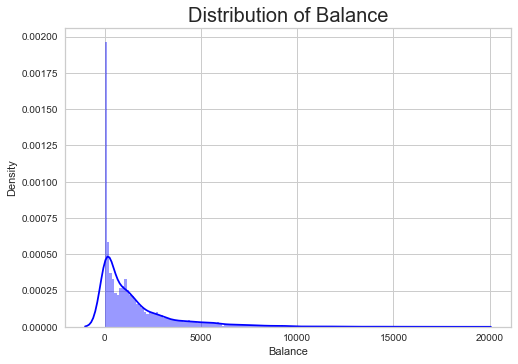

In [26]:
sns.distplot(df['BALANCE'], bins=150, color='blue')
plt.rcParams['figure.figsize'] = (8, 6)
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

**Interpretasi:**
Berdasarkan plot diatas, terlihat bahwa distribusi pada kolom saldo berkisar dari 0 sampai 20.000 dollar dan terdapat jumlah kartu kredit yang sangat tinggi pada saat saldo berjumlah 0.

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

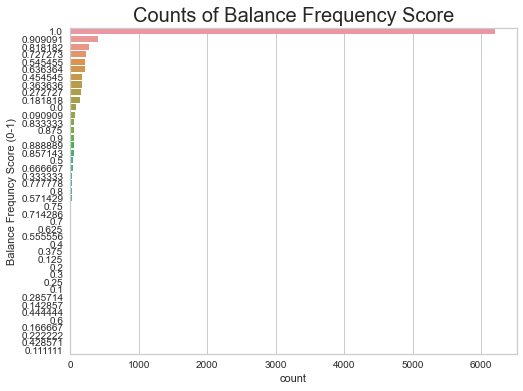

In [27]:
sns.countplot(y = df['BALANCE_FREQUENCY'], order = df['BALANCE_FREQUENCY'].value_counts().index)
plt.rcParams['figure.figsize'] = (8, 6)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

**Interpretasi:**

Berdasarkan plot diatas, terlihat bahwa frekuensi skor saldo dari 0 - 1, yang diberikan ke akun berdasarkan seberapa sering saldo akun diperbarui. sebagian besar akun memiliki skor 1 merupakan skor terbaik karena kebanyakan orang sering menggunakan kartu kredit dan hanya sedikit orang yang menjaga kartu relatif tidak aktif.

## Purchases

Bagian ini berisikan visualisasi terhadap kolom pembelian.

Text(0.5, 0, 'Purchases')

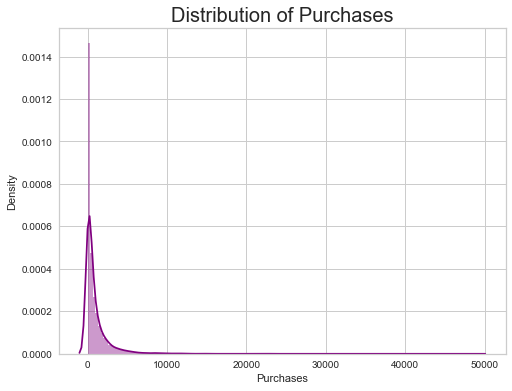

In [28]:
sns.distplot(df['PURCHASES'], color='purple', bins=150)
plt.rcParams['figure.figsize'] = (8, 6)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

**Interpretasi:**

Berdasarkan plot diatas, terlihat bahwa banyak orang yang tidak memiliki pembelian.

Text(0.5, 0, 'Amount')

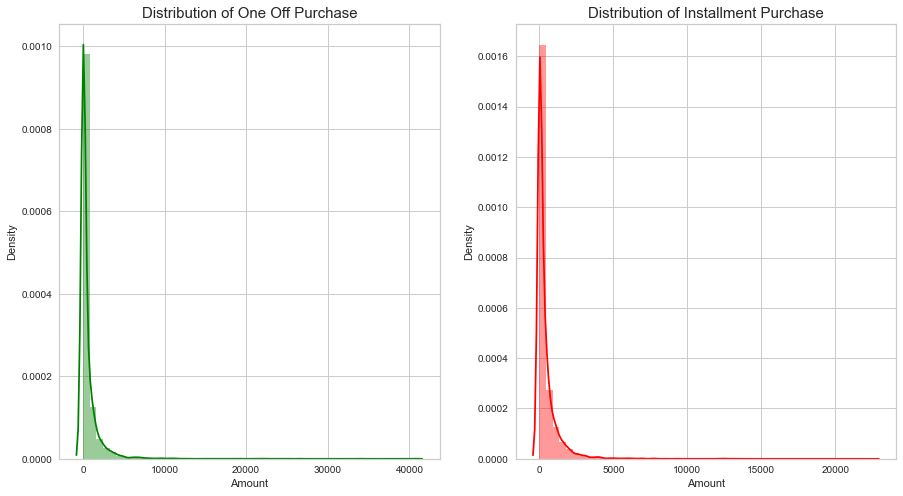

In [29]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 15)
plt.xlabel('Amount')


plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 15)
plt.xlabel('Amount')

**Interpretasi:**

Berdasarkan plot diatas, terlihat bahwa perbandingan antara distribusi pembelian satu kali dan pembelian angsuran. ini masih mengikuti tren akun saldo nol yang sama. pembelian satu kali naik hingga lebih dari 40.000 dollar, sedangkan pembelian cicilan tertinggi naik menjadi sekitar 25.000 dollar.

Text(0.5, 0, 'Purchases')

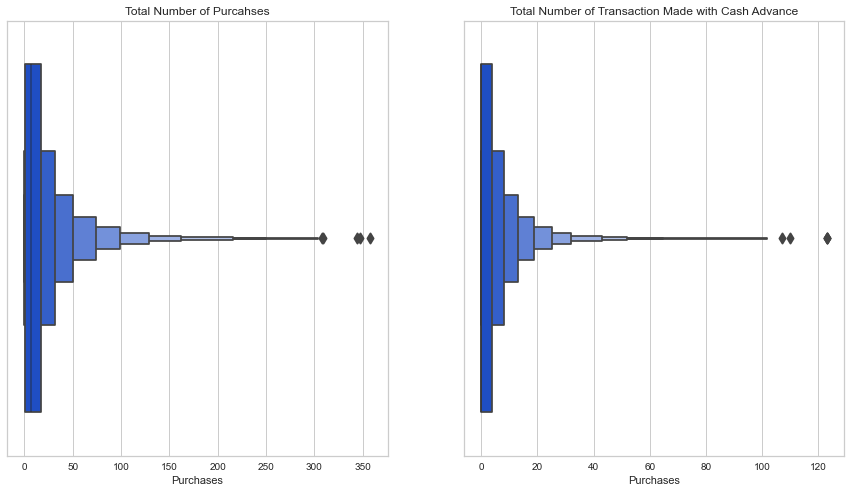

In [30]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(1,2,1)
sns.boxenplot(df['PURCHASES_TRX'])
plt.title('Total Number of Purcahses')
plt.xlabel('Purchases')

plt.subplot(1,2,2)
sns.boxenplot(df['CASH_ADVANCE_TRX'])
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('Purchases')

**Interpretasi:**

Berdasarkan output diatas, terlihat bahwa boxplot dari jumlah total pembelian dan jumlah transaksi yang dilakukan dengan menggunakan uang tunai. banyak orang dengan jumlah transaksi yang rendah, karena kita berasumsi bahwa orang menggunakan kartu kredit untuk pemanfaatan kredit dan bukan untuk pembelian. hanya ada beberapa orang yang membeli dengan kuantitas tinggi. beberapa orang membeli lebih dari 300 kali dan lebih sedikit yang melakukantransaksi dari 100 kali dengan uang tunai.

###  Scatter Plot

Bagian ini berisikan visualisasi menggunakan scatter plot antara batas kredit vs saldo dan berbagai jenis pembelian.

Text(0, 0.5, 'Credit limit')

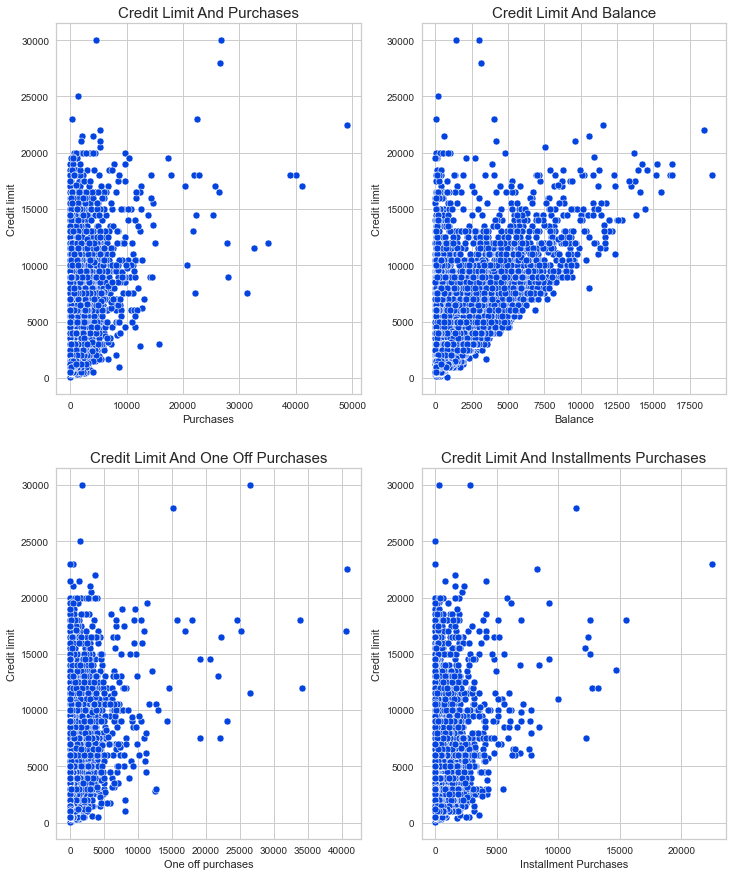

In [31]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Purchases', fontsize = 15)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Balance', fontsize = 15)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And One Off Purchases', fontsize = 15)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Installments Purchases', fontsize = 15)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

**Interpretasi:**

Berdasarkan plot diatas, terlihat bahwa perbandingan scatter plot antara batas kredit vs saldo dan berbagai jenis pembelian. tampaknya tidak ada korelasi yang kuat antara batas kredit dan variabel-variabel tersebut. bahkan, jumlah pembelian cenderung tetap nol sementara batas kredit meningkat. hal ini menunjukkan bahwa pengguna kartu kredit benar-benar ingin menjaga saldo mereka tetap rendah untuk memanfaatkan kredit mereka. kemungkinan bagi banyak orang, kartu kredit adalah alat untuk pemanfaatan kredit daripada alat belanja. namun, ada korelasi yang lebih baik ketika batas kredit naik, saldo juga naik.

##  Tenures

Bagian ini berisikan visualisasi terhadap kolom tenor (jangka waktu pelunasan kartu kredit).

Text(0.5, 0, 'Months')

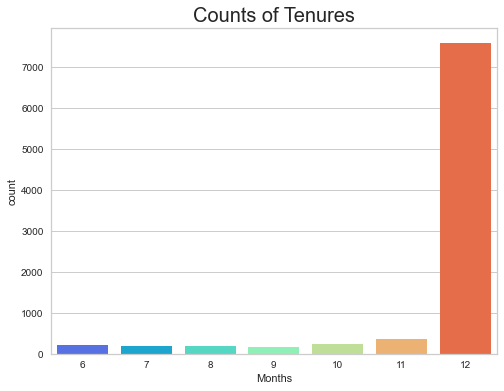

In [32]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(df['TENURE'], palette='rainbow')
plt.title('Counts of Tenures', fontsize = 20)
plt.xlabel('Months')

**Interpretasi:**

berdasarkan output diatas, terlihat bahwa tenor adalah jangka waktu pelunasan kartu kredit, berkisar antara 6-12 bulan. banyak yang melunasi kredit di bulan ke-12. semakin lama masa kredit, semakin banyak tingkat bunga yang dibayarkan. tetapi juga semakin banyak waktu yang harus dibayar dan tampaknya menjadi pilihan yang diinginkan orang.

###  Violin Plot

Bagian ini berisikan visualisasi menggunakan violin plot dari skor frekuensi yang berbeda.

Text(0.5, 0, 'Cash Advance Frequency')

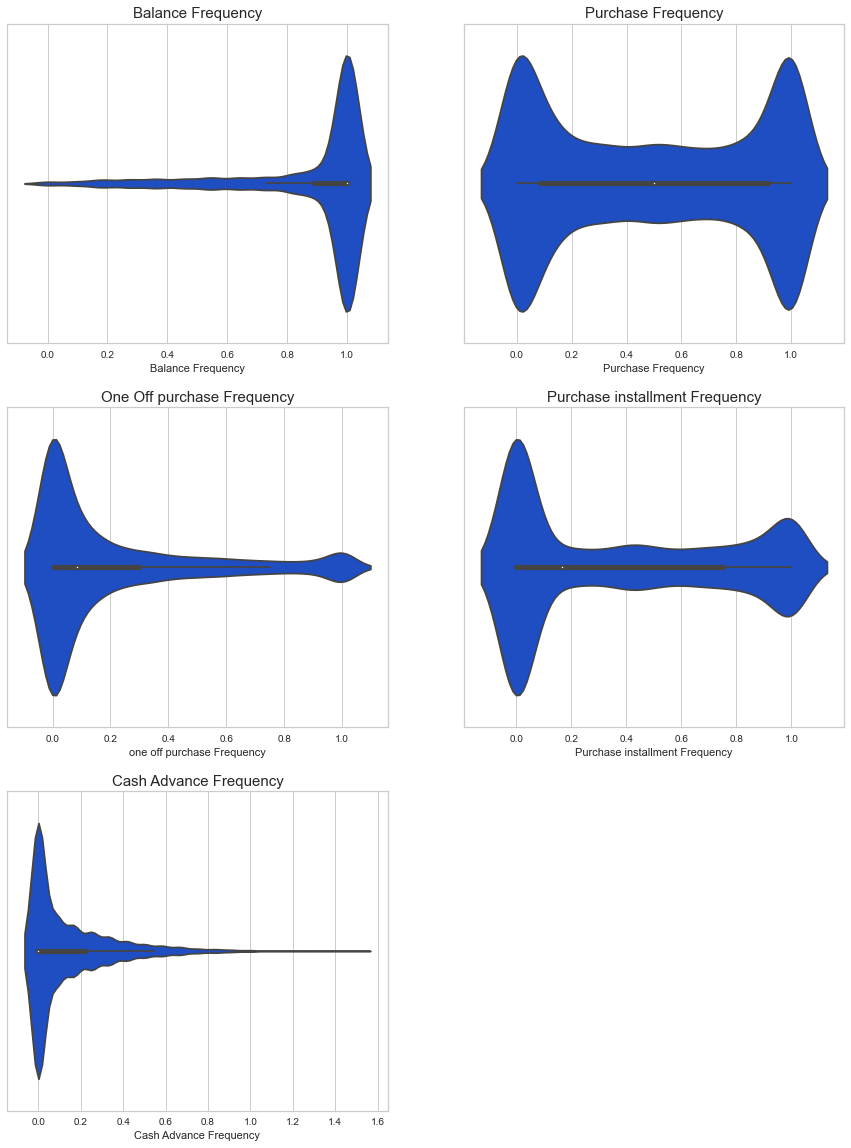

In [33]:
plt.rcParams['figure.figsize'] = (15, 20)

plt.subplot(3,2,1)
sns.violinplot(df['BALANCE_FREQUENCY'])
plt.title('Balance Frequency', fontsize = 15)
plt.xlabel('Balance Frequency')

plt.subplot(3,2,2)
sns.violinplot(df['PURCHASES_FREQUENCY'])
plt.title('Purchase Frequency', fontsize = 15)
plt.xlabel('Purchase Frequency')

plt.subplot(3,2,3)
sns.violinplot(df['ONEOFF_PURCHASES_FREQUENCY'])
plt.title('One Off purchase Frequency', fontsize = 15)
plt.xlabel('one off purchase Frequency')

plt.subplot(3,2,4)
sns.violinplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.title('Purchase installment Frequency', fontsize = 15)
plt.xlabel('Purchase installment Frequency')

plt.subplot(3,2,5)
sns.violinplot(df['CASH_ADVANCE_FREQUENCY'])
plt.title('Cash Advance Frequency', fontsize = 15)
plt.xlabel('Cash Advance Frequency')

**Interpretasi:**

Berdasarkan plot diatas, terlihat bahwa berbagai violin plot dari skor frekuensi yang berbeda dalam kumpulan data yang mencakup berbagai skor frekuensi (0-1). dimana 0 sebagai skor terendah dan 1 sebagai skor tertinggi.

- Dimulai dengan plot frekuensi keseimbangan mengenai seberapa sering orang memperbarui saldo mereka. ada sejumlah besar orang yang mencetak skor di sekitar 1, artinya orang sering memperbarui saldo. lalu ada kecenderungan pemegang kartu kredit untuk menjaga saldo mereka tetap rendah untuk penggunaan kredit. fakta bahwa banyak orang mendapat skor sangat tinggi mungkin disebabkan karena sering melunasi saldo agar tetap rendah atau bahkan memiliki saldo nol.

- Selanjutnya plot frekuensi pembelian atau seberapa sering orang melakukan pembelian. tampaknya ada jumlah orang yang sama, yang sering membeli dengan kartu kredit dan yang jarang melakukannya. ini adalah temuan yang menarik karena ketika melihat saldo distribusi sebelumnya, ada jauh lebih banyak orang dengan saldo 0 dan saldo rendah dibandingkan dengan orang dengan saldo tinggi. secara intuitif, jika ada jumlah yang sama antara orang yang sering membeli dan orang yang tidak, maka kita berharap distribusi keseimbangan memiliki jumlah yang rendah dan tinggi juga. jika frekuensi saldo tinggi, mungkin orang-orang sangat pandai melunasi kartu kredit mereka.

- Membandingkan antara frekuensi pembelian 1 kali dan frekuensi pembelian pemasangan, kita dapat melihat bahwa sebagian besar orang memiliki skor sekitar 0 yang berarti orang jarang membeli sejak awal. ada lebih banyak orang dengan skor frekuensi cicilan yang lebih tinggi daripada pembelian 1 kali. hal ini menandakan bahwa masyarakat lebih memilih untuk menggunakan pembelian dengan cicilan dibandingkan dengan pembelian 1 kali.

- Terakhir, frekuensi penarikan tunai. menunjukkan seberapa sering orang mendapatkan uang muka dan kebanyakan orang mendapat skor sekitar 0, artinya mereka tidak sering mendapatkan uang muka.

### Menangani Outlier

Boxplot dapat digunakan untuk mengecek outlier dalam data secara visual dan untuk mengidentifikasi distribusi data.

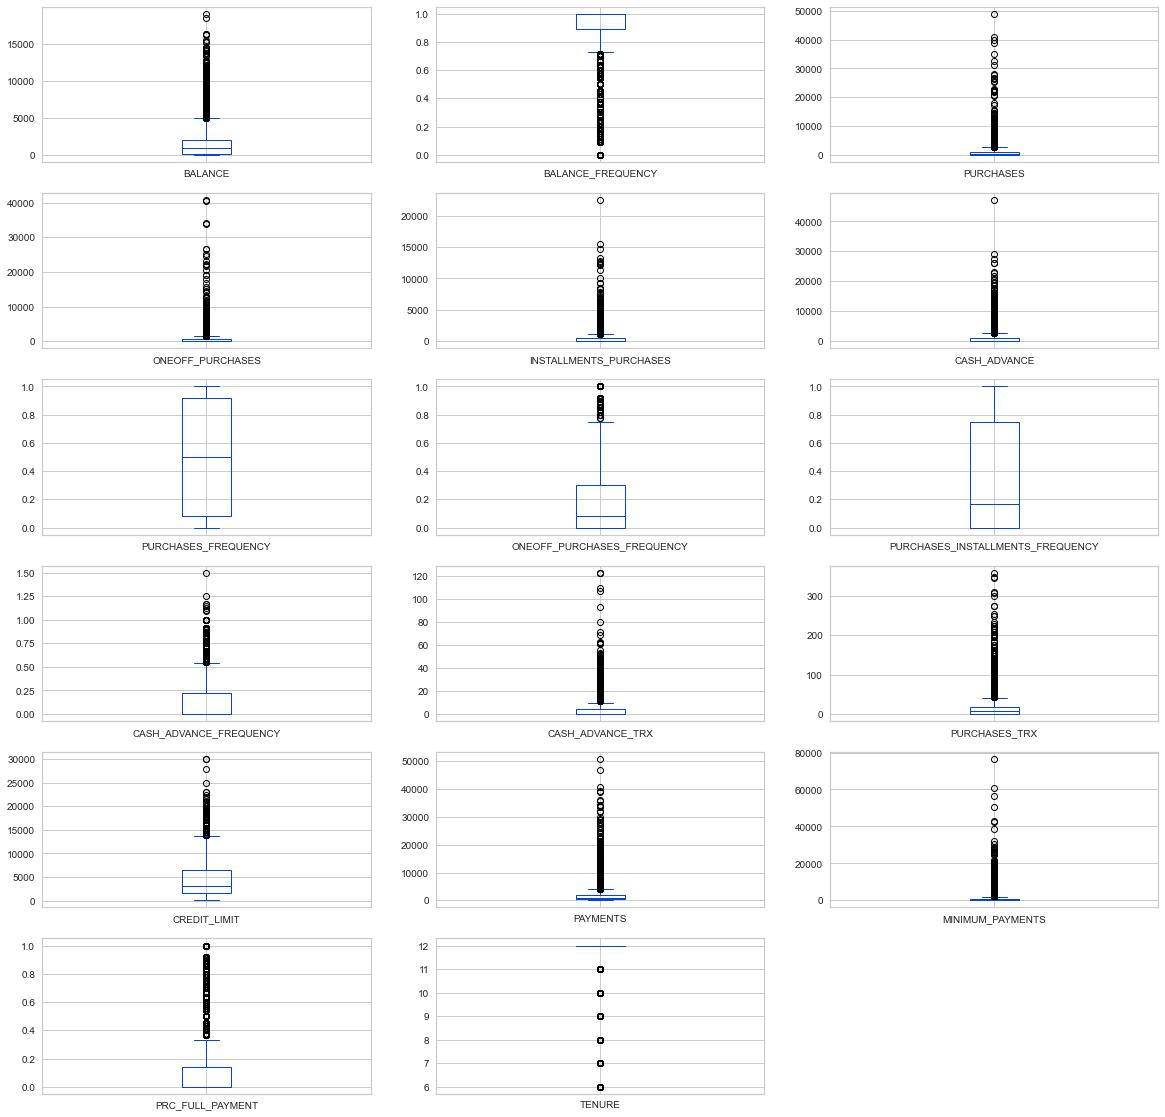

In [34]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(20,20));

**Mendeteksi Outlier dengan metode Interquartile Range (IQR)**

Terdapat outlier dalam dataset yang akan dihitung menggunakan Interquatile Range untuk memperkirakan batas bawah dan batas atas. Titik data apapun yang berada di atas batas atas dan Di bawah batas bawah akan diperlakukan sebagai outlier.

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_count = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outlier_count_df = pd.DataFrame(outlier_count)

In [36]:
def percent_of_outlier(value):
    Q1 = value.quantile(0.25)
    Q3 = value.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((value < minimum) |(value > maximum))
    num_total = value.count()
    return (num_outliers/num_total)*100

In [37]:
percentage_of_outlier = []
for column in df.columns:
    value = df[column]
    percentage_outlier = str(round(percent_of_outlier(value), 2))
    percentage_of_outlier.append(percentage_outlier)


percent_out = np.array(percentage_of_outlier)[:, np.newaxis]
cols_out = ('Percentage outliers',)
out_df = pd.DataFrame(percent_out).set_index(df.columns)

In [38]:
cols_missing = ['Count of Outliers', 'Percent of Outliers %']

df_outlier = pd.concat([outlier_count_df, out_df], axis=1)
df_outlier.columns = cols_missing

df_outlier

,Count of Outliers,Percent of Outliers %
BALANCE,695,7.77
BALANCE_FREQUENCY,1492,16.67
PURCHASES,808,9.03
ONEOFF_PURCHASES,1013,11.32
INSTALLMENTS_PURCHASES,867,9.69
CASH_ADVANCE,1030,11.51
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,782,8.74
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0
CASH_ADVANCE_FREQUENCY,525,5.87


Berdasarkan visualisasi box plot dan keterangan persentase outlier di atas, terlihat bahwa terdapat banyak outlier seperti pada fitur `BALANCE_FREQUENCY` dengan persentase outlier tertinggi yaitu 16.67%, hal tersebut bisa saja terjadi karena perilaku pelanggan tersebut memang sering melakukan pembaruan saldo, maka menghapus outlier ini tidak disarankan. Menghapus outlier dapat dilakukan jika jumlah outlier cenderung sedikit. Oleh karena itu, akan dilakukan ___scaling features___ (normalisasi data) untuk menangani kecondongan distribusi data atau outlier.

---
# F. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model.

Berikut langkah-langkah yang digunakan pada data preprocessing:

1. Melakukan Feature Selection
2. Menangani Skewness dengan Feature Scaling
3. Mereduksi dimensi menggunakan PCA
4. Menentukan jumlah klaster optimal menggunakan Metode Elbow
5. Melakukan perhitungan Silhouette Score dan Davies-Bouldin Index

### Heatmap untuk melihat korelasi antar fitur

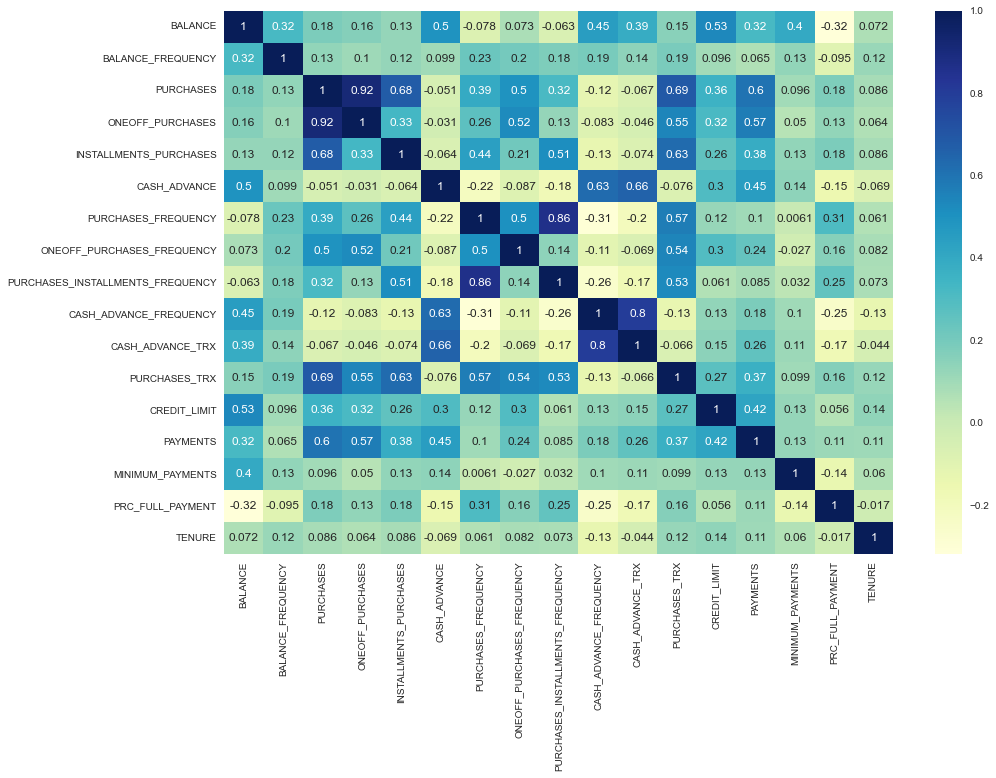

In [39]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Berdasarkan *heatmap* plot di atas, dapat diketahui bahwa:
1. Saldo (`BALANCE`) berkorelasi positif dengan uang muka (`CASH_ADVANCE`) dan limit kredit (`CREDIT_LIMIT`). Ini berarti semakin tinggi limit kredit dan uang di muka yang diberikan oleh pengguna, maka semakin banyak saldonya.
2. Transaksi pembelian (`PURCHASES`) berkorelasi positif dengan pembelian dalam satu kali transaksi (`ONEOFF_PURCHASES`) dan pembelian angsuran (`INSTALLMENTS_PURCHASES`). Dapat diartikan bahwa pengguna banyak melakukan transaksi dalam satu kali dan juga dalam bentuk cicilan/angsuran.
3. Biaya yang dikeluarkan (`PAYMENTS`) berkorelasi positif dengan pembelian satu kali transaksi (`ONEOFF_PURCHASES`), artinya semakin sering pengguna melakukan transaksi dalam satu kali transaksi, maka semakin banyak biaya yang dikeluarkan.
4. Limit kredit berkorelasi positif dengan saldo, pembelian, dan pembayaran. Artinya semakin tinggi jumlah limit kredit akan diikuti dengan semakin banyak nominal saldo, pembelian, dan pembayaran yang dilakukan pengguna.

### Feature Selection (Pemilihan Fitur)

Karena tujuan dalam proyek ini adalah pengelompokan (segmentasi pelanggan) dan hanya memproses pengelompokan menggunakan fitur terkait perilaku pelanggan, maka akan dilakukan penghapusan beberapa fitur.

- **`CASH_ADVANCE`** dan **`CASH_ADVANCE_TRX`** : Fitur ini menunjukkan jumlah uang muka dan jumlah transaksi dengan "_Cash in Advance_" (pembayaran dengan uang muka), maka fitur ini dapat diwakili oleh `CASH_ADVANCE_FREQUENCY` yang menunjukkan seberapa sering pengguna melakukan pembayaran dengan uang muka.
- **`PURCHASES_INSTALLMENTS_FREQUENCY`** : Fitur ini menunjukkan seberapa sering pembelian secara mencicil dilakukan, maka fitur ini dapat diwakili oleh `INSTALLMENTS_PURCHASES` yang menunjukkan jumlah pembelian dilakukan secara angsuran.
- **`PURCHASES_TRX`** : Fitur ini menunjukkan jumlah transaksi pembelian yang dilakukan. Fitur ini dapat diwakili oleh `PURCHASES_FREQUENCY` yang menunjukkan seberapa sering pembelian dilakukan.
- **`TENURE`** : Dianggap fitur ini tidak mendeskripsikan perilaku pelanggan karena hanya menunjukkan jangka waktu layanan kartu kredit.
- **`PRC_FULL_PAYMENT`** dan **`MINIMUM_PAYMENTS`** : Fitur ini hanya menunjukkan persentase pembayaran penuh yang dibayarkan oleh pengguna dan jumlah minimum pembayaran yang dilakukan oleh pengguna, sehingga dianggap kurang informatif dalam hal pembayaran. Fitur ini dapat diwakili oleh `PAYMENTS` yang menunjukkan jumlah pengeluaran biaya.

Melakukan penghapusan fitur yang tidak akan digunakan berdasarkan analisis sebelumnya

In [40]:
df.drop(columns=['CASH_ADVANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
                  'PURCHASES_TRX', 'TENURE', 'PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS'], inplace=True)
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS'],
      dtype='object')

Memvisualisasikan distribusi data untuk setiap fitur

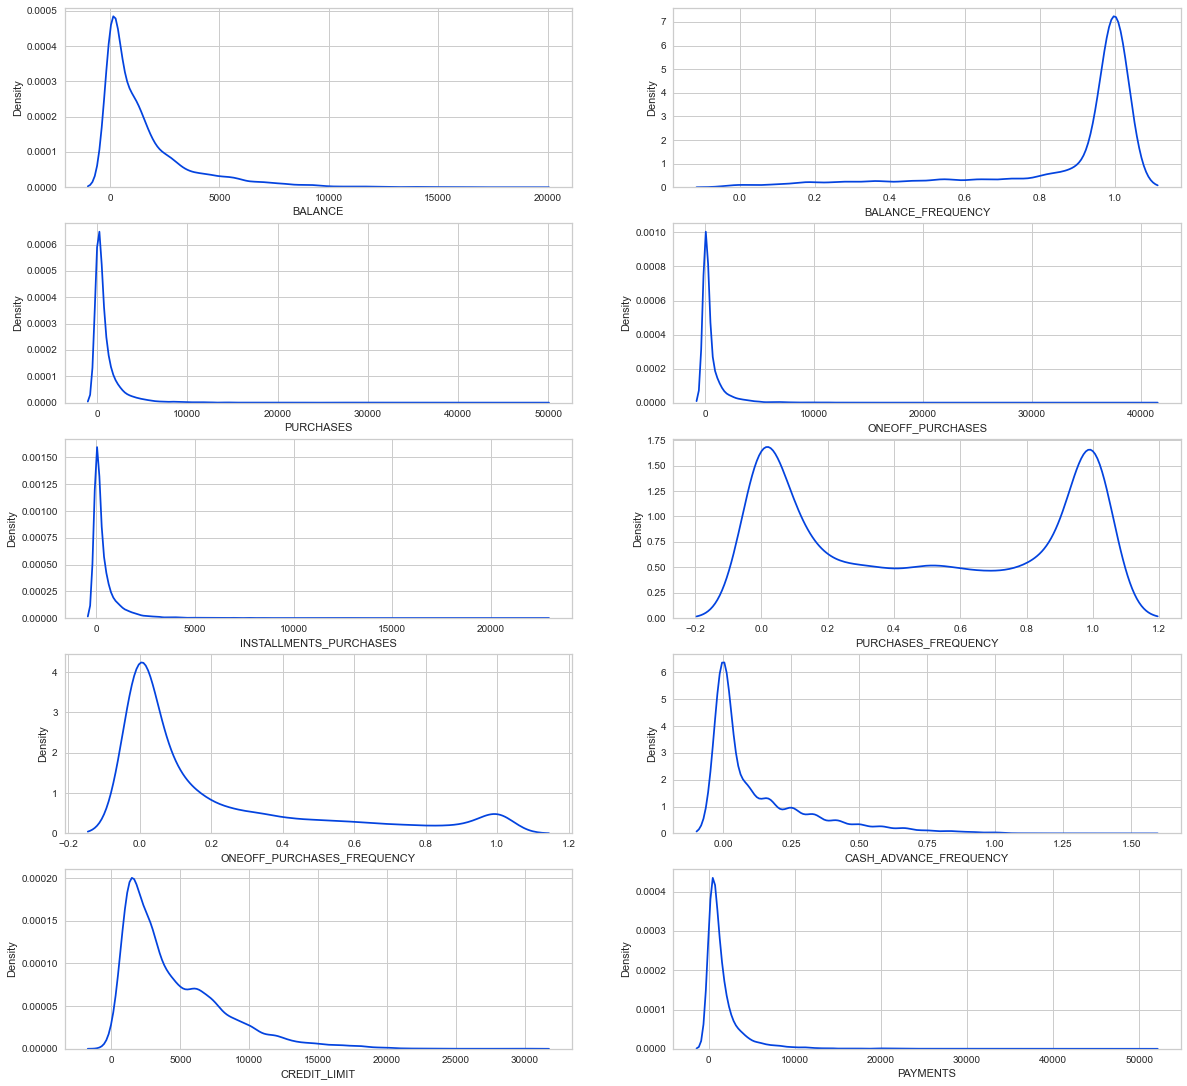

In [41]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
plt.show()

**Interpretasi:** Terdapat banyak kemiringan dan bervariasi, artinya pelanggan melakukan transaksi dalam jumlah yang sangat tinggi. Maka akan dilakukan ___feature scaling___ untuk menangani kecondongan data tersebut agar model dapat membentuk klaster (kelompok) yang lebih baik.

## Feature Scaling

### 1. Standard Scaler

StandardScaler merupakan metode untuk menormalkan fitur-fitursehingga setiap fitur akan memiliki nilai rata-rata bernilai 0 dan standar deviasi bernilai 1.

In [42]:
scaler_1 = StandardScaler()
scaler_1.fit(df)
standard_scaler = scaler_1.transform(df)

standard_scaler_df = pd.DataFrame(standard_scaler, columns = df.columns)
standard_scaler_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.806649,-0.678716,-0.675294,-0.960380,-0.529026
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,-1.221928,-0.678716,0.573949,0.688601,0.818546
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,1.269742,2.673295,-0.675294,0.826016,-0.383857
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-1.014290,-0.399383,-0.258882,0.826016,-0.598733
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-1.014290,-0.399383,-0.675294,-0.905414,-0.364421
...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,1.269742,-0.678716,-0.675294,-0.960380,-0.486266
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,1.269742,-0.678716,-0.675294,-0.960380,-0.503445
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,0.854463,-0.678716,-0.675294,-0.960380,-0.570660
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-1.221928,-0.678716,0.157536,-1.097795,-0.580581


In [43]:
standard_scaler_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
count,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,5.156601e-16,-7.789463e-15,-2.110948e-15,-3.777680e-15,6.572386e-16,-5.085514e-16,1.090520e-14,9.593647e-17,-7.897483e-16,7.491679e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.517040e-01,-3.705263e+00,-4.695839e-01,-3.569565e-01,-4.546069e-01,-1.221928e+00,-6.787162e-01,-6.752945e-01,-1.221468e+00,-5.987332e-01
25%,-6.900332e-01,4.873144e-02,-4.509562e-01,-3.569565e-01,-4.546069e-01,-1.014290e+00,-6.787162e-01,-6.752945e-01,-7.954817e-01,-4.663388e-01
50%,-3.319616e-01,5.179802e-01,-3.003952e-01,-3.340632e-01,-3.561912e-01,2.390672e-02,-3.993831e-01,-6.752945e-01,-4.107196e-01,-3.026846e-01
75%,2.352788e-01,5.179802e-01,5.001060e-02,-8.840161e-03,6.362342e-02,1.062103e+00,3.268871e-01,4.351431e-01,5.511855e-01,5.801121e-02
max,8.397195e+00,5.179802e-01,2.248248e+01,2.419985e+01,2.442576e+01,1.269742e+00,2.673295e+00,6.820167e+00,7.009692e+00,1.692160e+01


### 2. MinMax Scaler

MinMax Scaler digunakan untuk menskalakan setiap fitur ke rentang tertentu. MinMax Scaler ini menskalakan dan setiap fitur satu per satu sehingga berada dalam rentang yang diberikan pada set pelatihan.

In [44]:
scaler_2 = MinMaxScaler()
scaler_2.fit(df)
minmax_scaler = scaler_2.transform(df)

minmax_scaler_df = pd.DataFrame(minmax_scaler, columns = df.columns)
minmax_scaler_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.166667,0.000000,0.000000,0.031720,0.003979
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.232053,0.080893
2,0.131026,1.000000,0.015766,0.018968,0.000000,1.000000,1.000000,0.000000,0.248748,0.012264
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.083333,0.083333,0.055555,0.248748,0.000000
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.083333,0.083333,0.000000,0.038397,0.013374
...,...,...,...,...,...,...,...,...,...,...
8944,0.001496,1.000000,0.005936,0.000000,0.012939,1.000000,0.000000,0.000000,0.031720,0.006419
8945,0.001007,1.000000,0.006118,0.000000,0.013333,1.000000,0.000000,0.000000,0.031720,0.005439
8946,0.001229,0.833333,0.002945,0.000000,0.006418,0.833333,0.000000,0.000000,0.031720,0.001602
8947,0.000707,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.015025,0.001036


In [45]:
minmax_scaler_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,0.082163,0.877350,0.020459,0.014536,0.018272,0.490405,0.202480,0.090094,0.148396,0.034174
std,0.109309,0.236798,0.043572,0.040724,0.040195,0.401360,0.298345,0.133422,0.121496,0.057080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006741,0.888889,0.000812,0.000000,0.000000,0.083333,0.000000,0.000000,0.051753,0.007557
50%,0.045879,1.000000,0.007371,0.000932,0.003956,0.500000,0.083333,0.000000,0.098497,0.016897
75%,0.107880,1.000000,0.022638,0.014176,0.020829,0.916667,0.300000,0.148148,0.215359,0.037485
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Power Transformer

Power Transformer adalah metode untuk mengubah variabel input atau output numerik agar memiliki distribusi probabilitas yang seragam atau Gaussian.

In [46]:
scaler_3 = PowerTransformer(method='yeo-johnson')
scaler_3.fit(df)
pt_scaler = scaler_3.transform(df)

pt_scaler_df = pd.DataFrame(pt_scaler, columns = df.columns)
pt_scaler_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,-1.238338,-1.080160,-0.368311,-1.000587,0.383490,-0.767073,-0.903388,-0.883112,-1.425281,-0.984331
1,1.051883,-0.425620,-1.505361,-1.000587,-1.085536,-1.278999,-0.903388,1.124507,0.924151,1.285324
2,0.860506,0.628527,0.521492,1.065269,-1.085536,1.218811,1.732520,-0.883112,1.012124,-0.291996
3,0.570390,-1.711452,0.875720,1.229487,-1.085536,-1.016108,-0.092379,0.136204,1.012124,-2.783284
4,0.111719,0.628527,-0.905055,-0.020124,-1.085536,-1.016108,-0.092379,-0.883112,-1.215649,-0.231929
...,...,...,...,...,...,...,...,...,...,...
8944,-1.351592,0.628527,0.066354,-1.000587,0.748574,1.218811,-0.903388,-0.883112,-1.425281,-0.709303
8945,-1.465427,0.628527,0.079256,-1.000587,0.758482,1.218811,-0.903388,-0.883112,-1.425281,-0.807644
8946,-1.409570,-0.992133,-0.216552,-1.000587,0.518431,0.876335,-0.903388,-0.883112,-1.425281,-1.438390
8947,-1.558741,-0.992133,-1.505361,-1.000587,-1.085536,-1.278999,-0.903388,0.745986,-2.203169,-1.627323


In [47]:
pt_scaler_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
count,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,-4.938253e-17,-8.804122e-15,-1.400303e-15,-7.095751e-15,6.169808e-16,4.481708e-16,9.195659e-15,1.452011e-16,5.376561e-16,-6.828324e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-2.120398e+00,-1.997887e+00,-1.505361e+00,-1.000587e+00,-1.085536e+00,-1.278999e+00,-9.033884e-01,-8.831117e-01,-4.572732e+00,-2.783284e+00
25%,-8.167874e-01,-5.997311e-01,-6.538189e-01,-1.000587e+00,-1.085536e+00,-1.016108e+00,-9.033884e-01,-8.831117e-01,-8.805581e-01,-6.092456e-01
50%,1.516842e-01,6.285273e-01,1.608133e-01,2.372950e-01,3.609802e-01,1.194252e-01,-9.237935e-02,-8.831117e-01,-1.296753e-01,-6.436984e-02
75%,7.178628e-01,6.285273e-01,7.101365e-01,9.910054e-01,9.059779e-01,1.050193e+00,9.779170e-01,1.017007e+00,8.300226e-01,5.694160e-01
max,2.731527e+00,6.285273e-01,3.559725e+00,1.959353e+00,2.212357e+00,1.218811e+00,1.732520e+00,1.902604e+00,2.851692e+00,4.568730e+00


## Reduksi Dimensi menggunakan PCA

Principal Component Analysis (PCA) adalah teknik reduksi dimensi yang dapat digunakan untuk mengekstraksi informasi dari ruang dimensi tinggi dengan memproyeksikannya ke dalam sub-ruang berdimensi lebih rendah.

### 1. Standard Scaler

In [48]:
pca_vis_1 = PCA(random_state=42)
pca_vis_1.fit_transform(standard_scaler_df)
cumsum_pca_vis_1 = np.cumsum(pca_vis_1.explained_variance_ratio_)

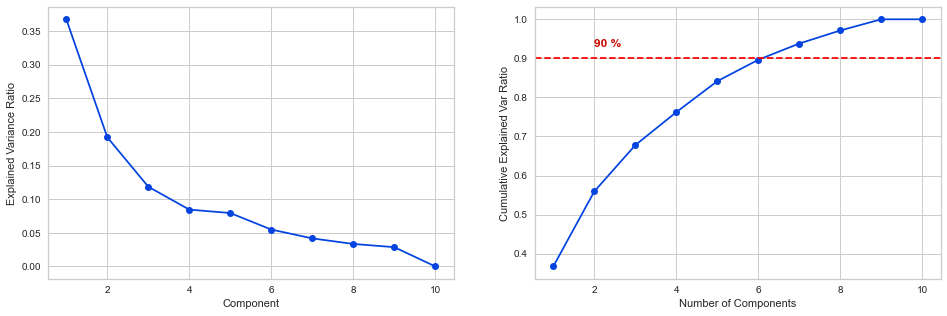

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.plot(range(1,11), pca_vis_1.explained_variance_ratio_, marker='o')
ax1.set_xlabel('Component')
ax1.set_ylabel('Explained Variance Ratio')

ax2.plot(range(1,11), cumsum_pca_vis_1, marker='o')
ax2.axhline(y=0.90, color='red', linestyle='--')
ax2.text(2, 0.93, '90 %', fontweight='bold', fontsize=12, color='r')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Var Ratio')

plt.show()

Setelah didapatkannya principal components, dapat diketahui explained_variance_ratio. Hal ini akan memberi informasi mengenai jumlah varians yang dimiliki setiap principal component setelah memproyeksikan data ke subruang dimensi yang lebih rendah.

In [50]:
pca1 = PCA(n_components=7, random_state=42)
pca_1 = pca1.fit_transform(standard_scaler_df)
cumsum_pca_1 = np.cumsum(pca1.explained_variance_ratio_)

PCA_1_df = pd.DataFrame(data = pca_1, columns = ['PC' + str(i) for i in range(1, 8)])

PCA_1_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.571263,-0.703389,0.449298,0.101989,0.477247,0.577349,-0.041957
1,-0.423625,1.860033,0.610120,0.075428,-0.159788,0.400346,0.573726
2,1.355792,-0.715018,-1.735321,-1.702545,-1.373380,-0.319367,-0.051232
3,-0.324369,0.250858,1.283380,-0.507660,-0.708243,0.693333,-0.732616
4,-1.321436,-0.257709,-0.078822,-0.081669,0.668142,0.956101,0.118625


In [51]:
cumsum_pca_1

array([0.36737441, 0.55930215, 0.67776525, 0.76220477, 0.8415456 ,
       0.8963407 , 0.93799064])

In [52]:
cumsum_pca_vis_1

array([0.36737441, 0.55930215, 0.67776525, 0.76220477, 0.8415456 ,
       0.8963407 , 0.93799064, 0.97138169, 0.99999883, 1.        ])

### 2. MinMax Scaler

In [53]:
pca_vis_2 = PCA(random_state=42)
pca_vis_2.fit_transform(minmax_scaler_df)
cumsum_pca_vis_2 = np.cumsum(pca_vis_2.explained_variance_ratio_)

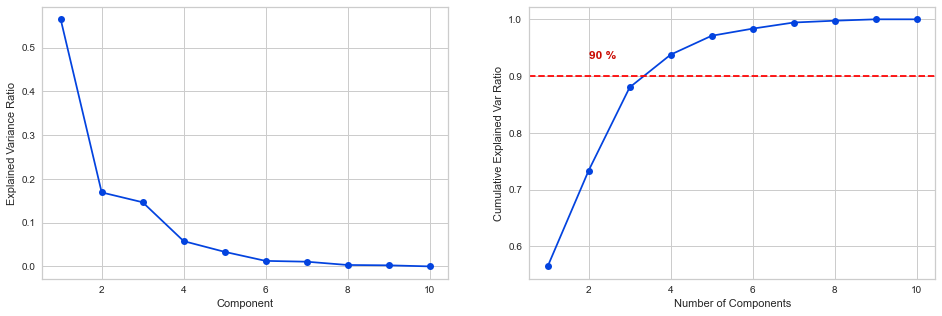

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.plot(range(1,11), pca_vis_2.explained_variance_ratio_, marker='o')
ax1.set_xlabel('Component')
ax1.set_ylabel('Explained Variance Ratio')

ax2.plot(range(1,11), cumsum_pca_vis_2, marker='o')
ax2.axhline(y=0.90, color='red', linestyle='--')
ax2.text(2, 0.93, '90 %', fontweight='bold', fontsize=12, color='r')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Var Ratio')

plt.show()

Setelah didapatkannya principal components, dapat diketahui explained_variance_ratio. Hal ini akan memberi informasi mengenai jumlah varians yang dimiliki setiap principal component setelah memproyeksikan data ke subruang dimensi yang lebih rendah.

In [55]:
pca2 = PCA(n_components=4, random_state=42)
pca_2 = pca2.fit_transform(minmax_scaler_df)
cumsum_pca_2 = np.cumsum(pca2.explained_variance_ratio_)

PCA_2_df = pd.DataFrame(data = pca_2, columns = ['PC' + str(i) for i in range(1, 5)])

PCA_2_df.head()

,PC1,PC2,PC3,PC4
0,-0.384801,0.069253,0.001947,-0.156384
1,-0.511627,-0.167411,-0.055766,0.087336
2,0.851733,-0.322438,0.290937,-0.060989
3,-0.436356,0.013317,0.205205,0.067474
4,-0.383553,-0.129223,-0.070553,-0.208251


Berdasarkan hasil di atas, dapat diamati bahwa Principal Component 1 menampung 56,44% informasi,  Principal Component 2 menampung 16,9% informasi, Principal Component 3 menampung 14,64% informasi dan Principal Component 4 menampung 5,77% informasi. Dengan begitu, 6,25% informasi hilang pada saat memproyeksikan data 10 dimensi menjadi empat dimensi. Selanjutnya akan dibuat model PCA baru dengan jumlah kompenen sebanyak 4. Terlihat bahwa empat komponen utama pertama menjelaskan sebagian besar varian dalam kumpulan data ini mempertahkan (93,77%) informasi.

In [56]:
cumsum_pca_2

array([0.56449553, 0.73351656, 0.88001615, 0.93772346])

In [57]:
cumsum_pca_vis_2

array([0.56449553, 0.73351656, 0.88001615, 0.93772346, 0.97097499,
       0.98355679, 0.99430659, 0.99753212, 0.99999994, 1.        ])

### 3. Power Transformer

In [58]:
pca_vis_3 = PCA(random_state=42)
pca_vis_3.fit_transform(pt_scaler_df)
cumsum_pca_vis_3 = np.cumsum(pca_vis_3.explained_variance_ratio_)

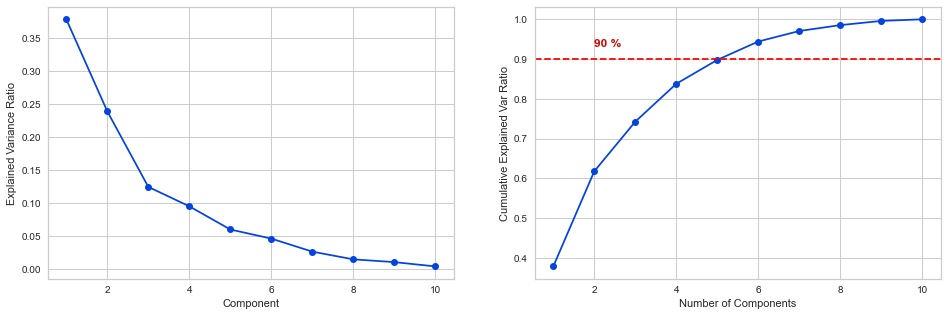

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.plot(range(1,11), pca_vis_3.explained_variance_ratio_, marker='o')
ax1.set_xlabel('Component')
ax1.set_ylabel('Explained Variance Ratio')

ax2.plot(range(1,11), cumsum_pca_vis_3, marker='o')
ax2.axhline(y=0.90, color='red', linestyle='--')
ax2.text(2, 0.93, '90 %', fontweight='bold', fontsize=12, color='r')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Var Ratio')

plt.show()

In [60]:
pca3 = PCA(n_components=6, random_state=42)
pca_3 = pca3.fit_transform(pt_scaler_df)
cumsum_pca_3 = np.cumsum(pca3.explained_variance_ratio_)
cumsum_pca_3

PCA_3_df = pd.DataFrame(data = pca_3, columns = ['PC' + str(i) for i in range(1, 7)])

PCA_3_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.688486,-2.355054,0.120609,-0.014220,0.371615,-0.226604
1,-2.142351,2.182172,0.012347,1.492172,0.203693,-0.422146
2,1.964911,0.727281,-1.130051,-0.787735,-1.362049,-0.183681
3,-0.568696,-0.400026,-2.329033,-0.007679,-1.610632,2.004651
4,-1.308637,-0.050194,-0.518527,-1.288615,-0.168427,-1.384197


In [61]:
cumsum_pca_vis_3

array([0.37878731, 0.61799365, 0.74264699, 0.83786561, 0.89790655,
       0.94413196, 0.97059817, 0.98536789, 0.99593107, 1.        ])

In [62]:
cumsum_pca_3

array([0.37878731, 0.61799365, 0.74264699, 0.83786561, 0.89790655,
       0.94413196])

## Menentukan jumlah klaster optimal menggunakan Metode Elbow

Metode kurva Elbow digunakan untuk menentukan jumlah klaster optimal. Metode ini bekerja dengan menemukan WCSS (_Within-Cluster Sum of Square_), yaitu jumlah jarak kuadrat antara titik-titik dalam sebuah cluster dan centroid cluster.

In [63]:
kmeans_constants = {'n_init' : 10, 'max_iter' : 300, 'random_state': 42, 'init':'k-means++'}
model_kmeans_clusters = KMeans(kmeans_constants)

Melakukan visualisasi metode Elbow hasil ___feature scaling___ menggunakan Standard Scaler

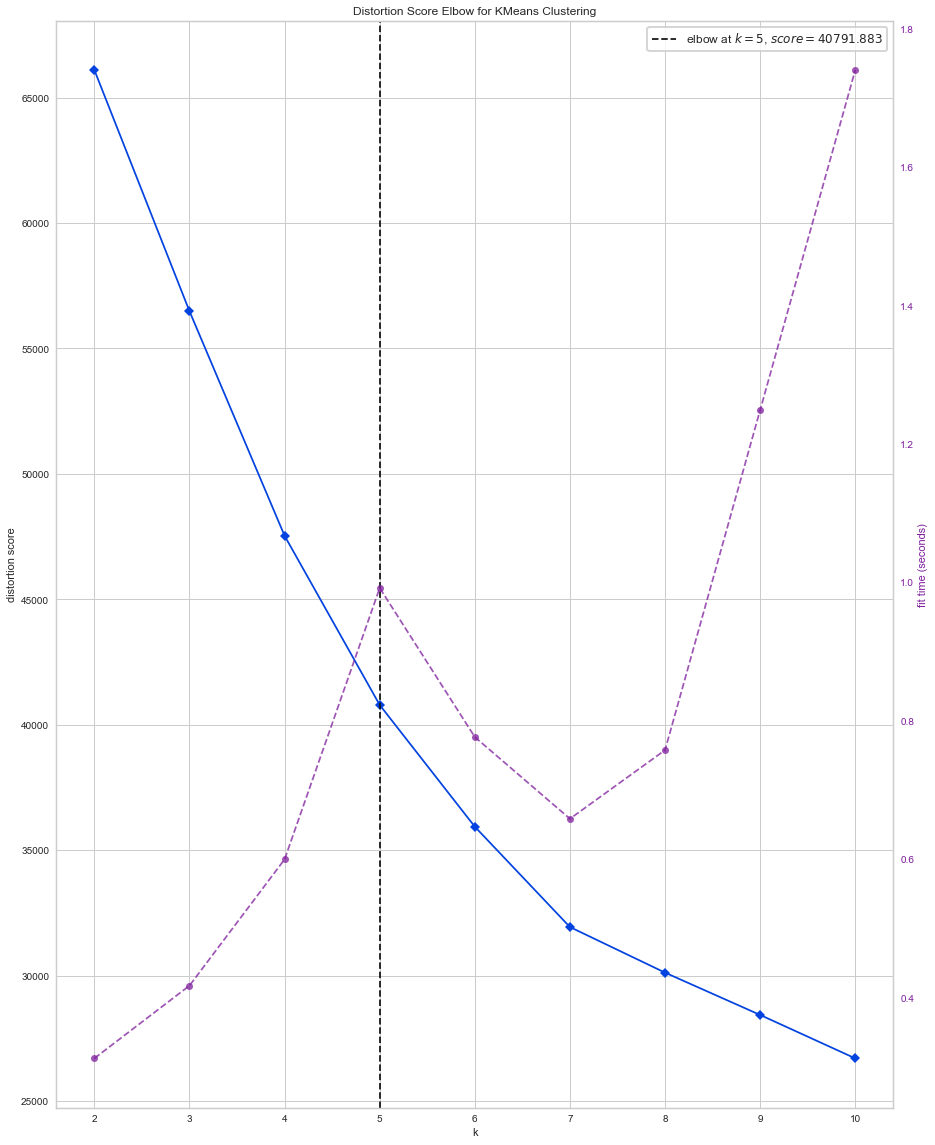

In [64]:
Elbow_vis_1 = KElbowVisualizer(model_kmeans_clusters, k=10)
Elbow_vis_1.fit(PCA_1_df)
Elbow_vis_1.show()

plt.show()

Melakukan visualisasi metode Elbow hasil ___feature scaling___ menggunakan MinMax Scaler

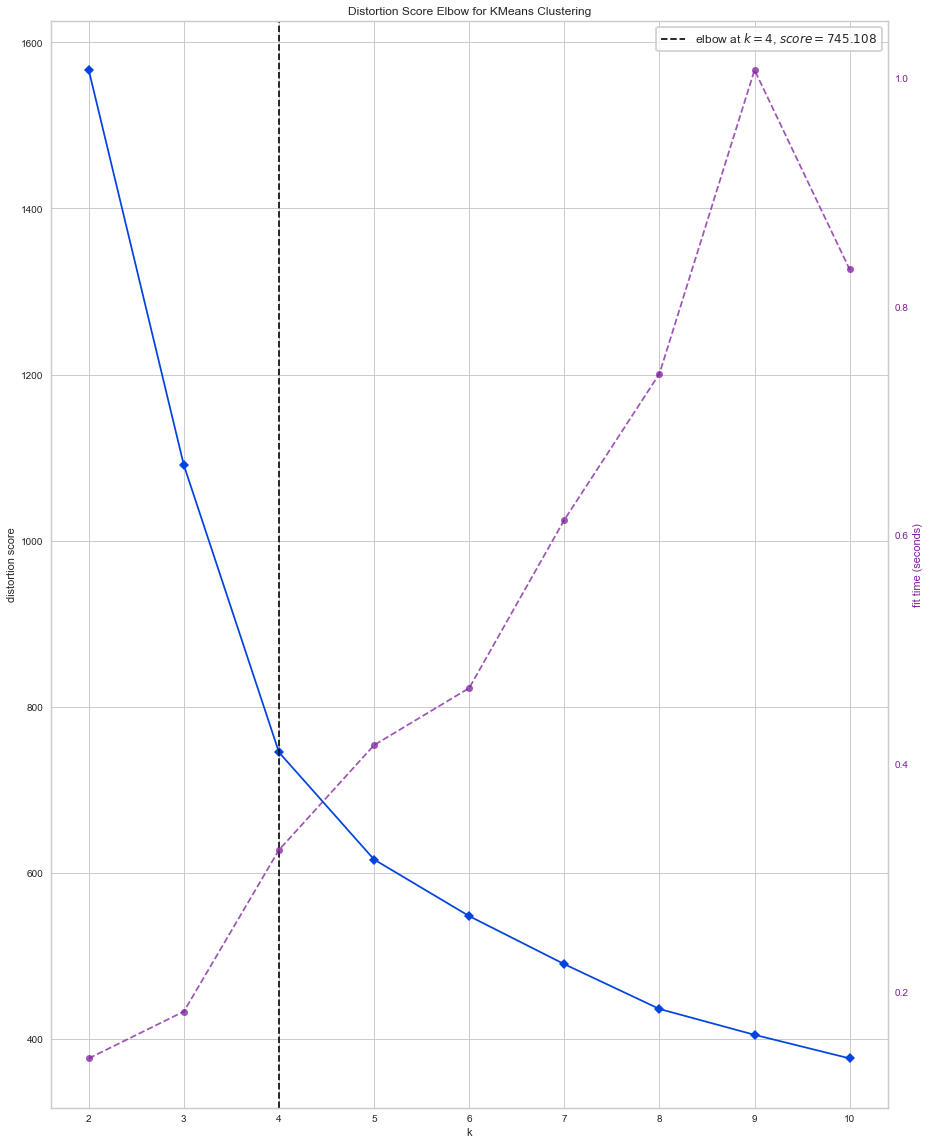

In [65]:
Elbow_vis_2 = KElbowVisualizer(model_kmeans_clusters, k=10)
Elbow_vis_2.fit(PCA_2_df)
Elbow_vis_2.show()
plt.show()

Melakukan visualisasi metode Elbow hasil ___feature scaling___ menggunakan Power Transformer

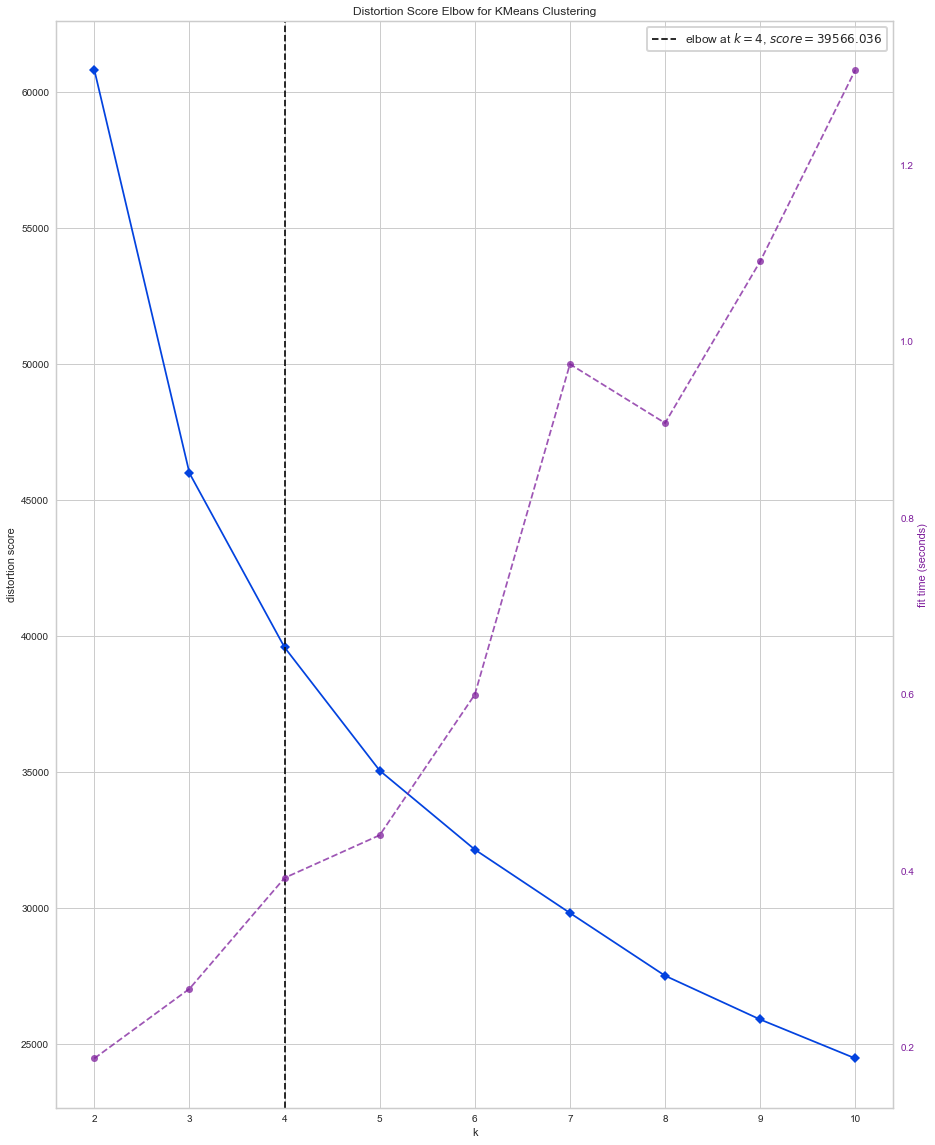

In [66]:
Elbow_vis_3 = KElbowVisualizer(model_kmeans_clusters, k=10)
Elbow_vis_3.fit(PCA_3_df)
Elbow_vis_3.show()
plt.show()

In [67]:
# melihat jumlah klaster optimal

print('Jumlah klaster optimal dengan Standard Scaler: ', Elbow_vis_1.elbow_value_)
print('Jumlah klaster optimal dengan MinMax Scaler: ', Elbow_vis_2.elbow_value_)
print('Jumlah klaster optimal dengan Power Transformer: ', Elbow_vis_3.elbow_value_)

Jumlah klaster optimal dengan Standard Scaler:  5
Jumlah klaster optimal dengan MinMax Scaler:  4
Jumlah klaster optimal dengan Power Transformer:  4


Dapat terlihat secara grafis bahwa klaster bahwa :
- Klaster berjumlah 6 adalah yang paling optimal untuk _feature scaling_ menggunakan Standard Scaler.
- Klaster berjumlah 4 adalah yang paling optimal untuk _feature scaling_ menggunakan MinMax Scaler.
- Klaster berjumlah 4 adalah yang paling optimal untuk _feature scaling_ menggunakan Power Transformer.

Melatih model Kmeans menggunakan berbagai _feature scaling_ yang telah dilakukan sebelumnya.

In [68]:
# melatih model dengan Standard Scaler
model_Kmeans_1 = KMeans(Elbow_vis_1.elbow_value_, init='k-means++', random_state=42)
labels_1 = model_Kmeans_1.fit_predict(PCA_1_df)

In [69]:
# melatih model dengan MinMax Scaler
model_Kmeans_2 = KMeans(Elbow_vis_2.elbow_value_, init='k-means++', random_state=42)
labels_2 = model_Kmeans_2.fit_predict(PCA_2_df)

In [70]:
# melatih model dengan Power Transformer
model_Kmeans_3 = KMeans(Elbow_vis_3.elbow_value_, init='k-means++', random_state=42)
labels_3 = model_Kmeans_3.fit_predict(PCA_3_df)

Membuat kebutuhan dataframe yang telah dilakukan ___feature scaling___ dan reduksi dimensi sebelumnya disertai dengan klaster berdasarkan setiap observasi data untuk kebutuhan analisis lebih lanjut.

In [71]:
standard_scaler_df['LABELS'] = labels_1
PCA1_with_labels = PCA_1_df.copy()
PCA1_with_labels['LABELS'] = labels_1

minmax_scaler_df['LABELS'] = labels_2
PCA2_with_labels = PCA_2_df.copy()
PCA2_with_labels['LABELS'] = labels_2

pt_scaler_df['LABELS'] = labels_3
PCA3_with_labels = PCA_3_df.copy()
PCA3_with_labels['LABELS'] = labels_3

Menghitung nilai ___silhouette coefficient___ yang terletak pada kisaran nilai -1 hingga 1. Semakin nilai silhouette coefficient mendekati nilai 1, maka semakin baik pengelompokan data dalam satu cluster. Sebaliknya jika silhouette coefficient mendekati nilai -1, maka semakin buruk pengelompokan data didalam satu cluster. 

In [72]:
sil_scaler_1 = silhouette_score(PCA_1_df, labels_1)
sil_scaler_2 = silhouette_score(PCA_2_df, labels_2)
sil_scaler_3 = silhouette_score(PCA_3_df, labels_3)

Skor **Davies-Bouldin Index (DBI)** dihitung sebagai kesamaan rata-rata dari setiap klaster dengan klaster yang memiliki karakterisik dekat dengannya. Semakin rendah rata-rata kesamaannya, semakin baik cluster dipisahkan dan semakin baik hasil clustering yang dilakukan.

In [73]:
db_scaler_1 = davies_bouldin_score(PCA_1_df, labels_1)
db_scaler_2 = davies_bouldin_score(PCA_2_df, labels_2)
db_scaler_3 = davies_bouldin_score(PCA_3_df, labels_3)

In [74]:
df_metric = pd.DataFrame({'Standard Scaler': [sil_scaler_1, db_scaler_1],
                          'MinMax Scaler' : [sil_scaler_2, db_scaler_2],
                          'Power Transformer' : [sil_scaler_3, db_scaler_3]}, 
                          index = ['Silhouette Score', 'Davies-Bouldin'])
df_metric.T

,Silhouette Score,Davies-Bouldin
Standard Scaler,0.279479,1.168942
MinMax Scaler,0.473826,0.819113
Power Transformer,0.288451,1.249385


**Interpretasi:** Terlihat bahwa data yang dilakukan _feature scaling_ menggunakan MinMax Scaler menunjukkan pengelompokan data paling optimal ditandai dengan **Silhouette Score** paling tinggi bernilai 0.473826	dengan nilai **Davies-Bouldin Index** terendah bernilai 0.819113. Maka akan dilakukan pelatihan model K-Means Clustering dengan _feature scaling_ MinMax Scaler.

### Menentukan jumlah klaster optimal  untuk model _Agglomerative Hierarchal Clustering_ (AHC)

Melakukan visualisasi metode Elbow untuk model AHC

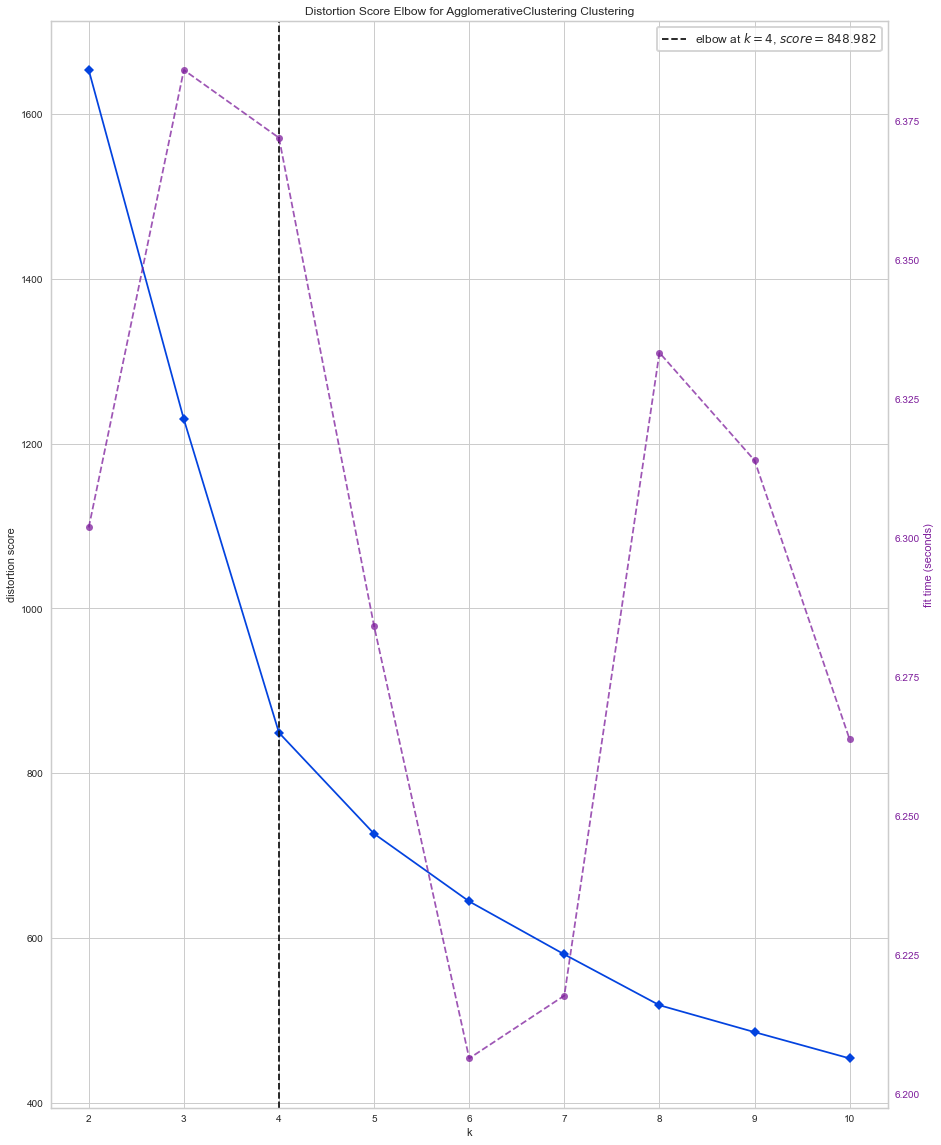

In [75]:
ahc_constants = {'affinity' : 'euclidean', 'linkage' : 'ward'}
model_ahc_clusters = AgglomerativeClustering(ahc_constants)

Elbow_vis_ahc = KElbowVisualizer(model_ahc_clusters, k=10)
Elbow_vis_ahc.fit(PCA_2_df)
Elbow_vis_ahc.show()
plt.show()

In [76]:
model_for_ahc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage='ward')
labels_ahc_2 = model_for_ahc.fit_predict(PCA_2_df)
silhouette_score(PCA_2_df, labels_ahc_2)

0.437403437788149

In [77]:
davies_bouldin_score(PCA_2_df, labels_ahc_2)

0.8408097725893777

Terlihat bahwa skor yang dihasilkan untuk model AHC tidak jauh berbeda dengan model K-Means, maka model AHC dapat dianalisis lebih lanjut di luar proyek ini.

Melakukan visualisasi data hasil klasterisasi menggunakan Dendrogram

In [78]:
wardlink = linkage(PCA_2_df, method = 'ward')

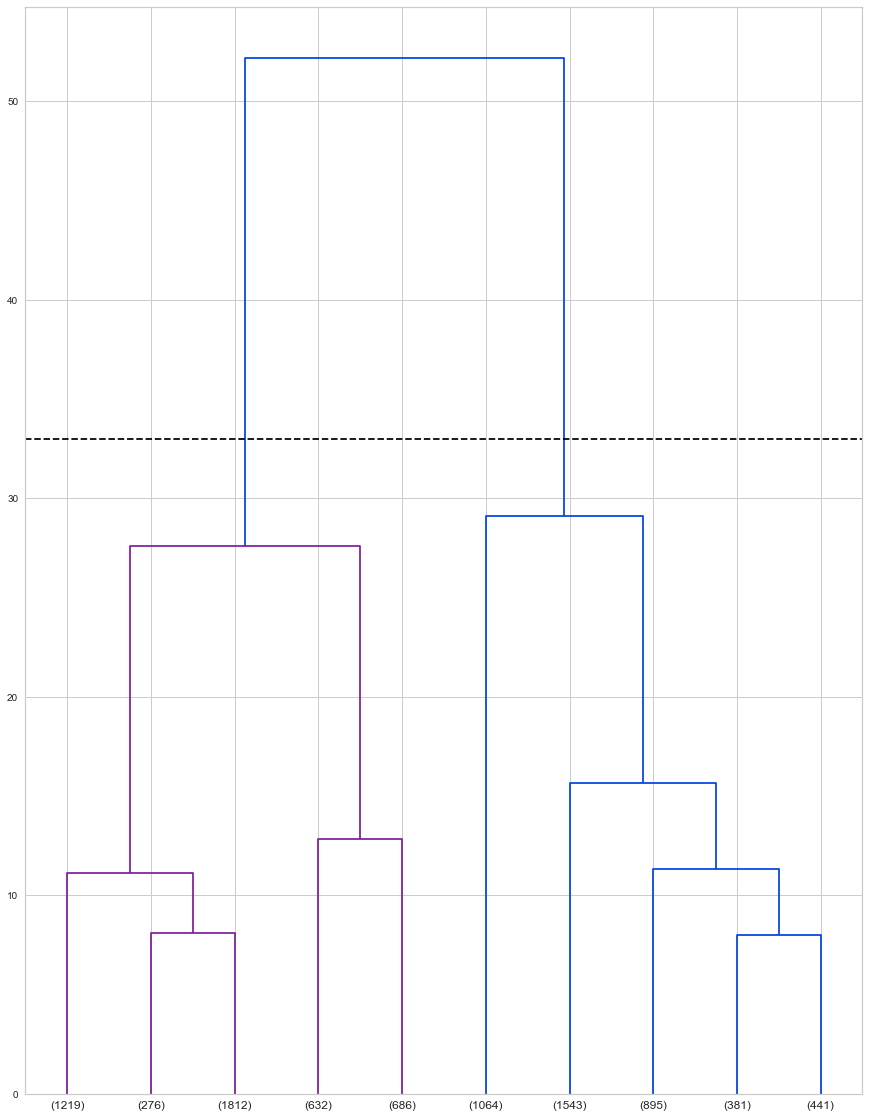

In [79]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10)
plt.axhline(y=33, color='black', linestyle='--')
plt.show()

**Interpretasi:** Semakin jauh jarak garis vertikal dalam dendrogram, semakin besar pula jarak antar cluster tersebut. Pada kasus ini berdasarkan metode Elbow jumlah klaster paling optimal untuk model AHC berjumlah 4 klaster.

---
# G. Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

## Model : K-Means Clustering

Model yang digunakan yaitu K-Means Clustering. Model ini menentukan kelompok-kelompok dalam set data. K-means berfungsi menghitung jarak untuk menetapkan titik ke sebuah cluster. Di K-means, setiap cluster dikaitkan dengan centroid.

In [80]:
model_Kmeans = KMeans(n_clusters = 4, n_init = 10, init = 'k-means++', max_iter = 300, random_state = 42)

---
# H. Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [81]:
model_Kmeans_train = model_Kmeans.fit_predict(PCA_2_df)

In [82]:
print('Silhoutte score = ' + str(silhouette_score(PCA_2_df, model_Kmeans.labels_)))

Silhoutte score = 0.47382644516388595


In [83]:
print('Davies–Bouldin Index = ' + str(davies_bouldin_score(PCA_2_df, model_Kmeans.labels_)))

Davies–Bouldin Index = 0.8191133524630647


In [84]:
df_metric.T

,Silhouette Score,Davies-Bouldin
Standard Scaler,0.279479,1.168942
MinMax Scaler,0.473826,0.819113
Power Transformer,0.288451,1.249385


---
# I. Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih.

## Interpretasi karakteristik masing-masing klaster

Menampilkan nilai centroid untuk setiap klaster

In [85]:
model_Kmeans.cluster_centers_

array([[-0.37242228,  0.27705305,  0.36917172,  0.04279827],
       [ 0.26773948,  0.21095892, -0.18605881,  0.01360137],
       [ 0.63687279, -0.23189019,  0.19138484, -0.01460989],
       [-0.38309938, -0.16187461, -0.08285502, -0.02003087]])

Menggabungkan data kredit bank dengan hasil PCA

In [86]:
data_pca_kmeans = pd.concat([df, PCA_2_df], axis=1)
data_pca_kmeans['Cluster'] = model_Kmeans_train 
data_pca_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PC1,PC2,PC3,PC4,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.166667,0.000000,0.000000,1000.0,201.802084,-0.384801,0.069253,0.001947,-0.156384,3
1,3202.467416,0.909091,0.00,0.00,0.00,0.000000,0.000000,0.250000,7000.0,4103.032597,-0.511627,-0.167411,-0.055766,0.087336,3
2,2495.148862,1.000000,773.17,773.17,0.00,1.000000,1.000000,0.000000,7500.0,622.066742,0.851733,-0.322438,0.290937,-0.060989,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,0.083333,0.083333,0.083333,7500.0,0.000000,-0.436356,0.013317,0.205205,0.067474,0
4,817.714335,1.000000,16.00,16.00,0.00,0.083333,0.083333,0.000000,1200.0,678.334763,-0.383553,-0.129223,-0.070553,-0.208251,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,1.000000,0.000000,0.000000,1000.0,325.594462,0.354305,0.341279,-0.309390,-0.080051,1
8945,19.183215,1.000000,300.00,0.00,300.00,1.000000,0.000000,0.000000,1000.0,275.861322,0.354308,0.341438,-0.309361,-0.080430,1
8946,23.398673,0.833333,144.40,0.00,144.40,0.833333,0.000000,0.000000,1000.0,81.270775,0.183669,0.359556,-0.149544,-0.060559,1
8947,13.457564,0.833333,0.00,0.00,0.00,0.000000,0.000000,0.166667,500.0,52.549959,-0.533956,-0.036148,0.010932,-0.145717,3


Membuat dataframe data kartu kredit yang dikenai fungsi agregasi _mean_ (rata-rata) berdasarkan setiap klaster

**Berikut ini nilai rata-rata setiap fitur berdasarkan klaster**

In [87]:
data_pca_kmeans_freq = data_pca_kmeans.groupby(['Cluster']).mean()
data_pca_kmeans_freq

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PC1,PC2,PC3,PC4
Cluster,,,,,,,,,,,,,,
0,162.265067,0.370142,339.533121,222.591600,117.175406,0.227525,0.070592,0.047887,3807.044479,1296.205146,-0.372422,0.277053,0.369172,0.042798
1,1153.146708,0.942289,1003.265074,246.441643,757.488594,0.853219,0.091722,0.074872,3862.118027,1346.148011,0.267653,0.211041,-0.186113,0.013598
2,1987.743693,0.975164,3102.848704,2272.673372,830.350362,0.885400,0.767783,0.099501,6652.086777,3147.516682,0.636789,-0.231753,0.191242,-0.014587
3,2220.258248,0.969522,235.868713,195.329800,40.631761,0.106733,0.067099,0.233839,4215.679741,1523.650747,-0.383099,-0.161875,-0.082855,-0.020031


In [88]:
# menampilkan nilai rata-rata setiap fitur
df.mean()

BALANCE                       1564.647593
BALANCE_FREQUENCY                0.877350
PURCHASES                     1003.316936
ONEOFF_PURCHASES               592.503572
INSTALLMENTS_PURCHASES         411.113579
PURCHASES_FREQUENCY              0.490405
ONEOFF_PURCHASES_FREQUENCY       0.202480
CASH_ADVANCE_FREQUENCY           0.135141
CREDIT_LIMIT                  4494.449450
PAYMENTS                      1733.336511
dtype: float64

Melakukan scatter plot antara PC1 dan PC2 untuk melihat pembagian klaster

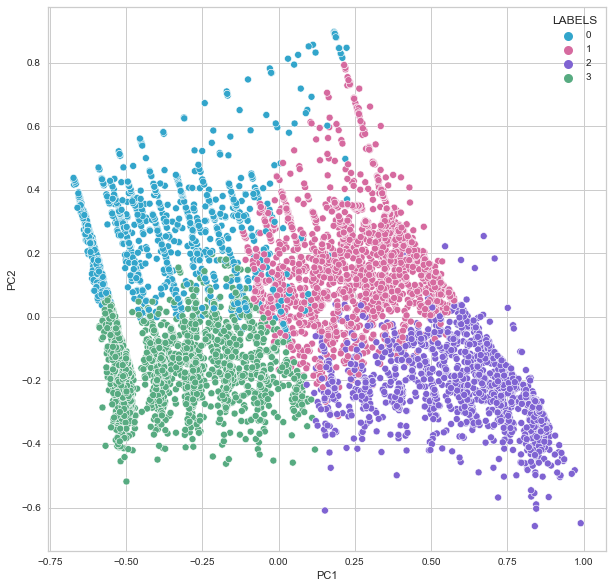

In [89]:
# Membuat visualisasi klaster
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PC1", y="PC2", hue = "LABELS", data = PCA2_with_labels,
                     palette =['#32a5cb','#d66a9f','#7f63d2','#57ab81'])
plt.show()

## Visualisasi Dimensi Tinggi menggunakan t-SNE

**___t-Distributed Stochastic Neighbor Embedding___ (t-SNE)** menggambarkan kumpulan data yang disusun dalam ruang berdimensi tinggi berdasarkan kedekatan karakteristik setiap datanya.

In [90]:
embeddings = TSNE(perplexity=5, init='pca', random_state=42).fit_transform(PCA_2_df)

In [91]:
def plot_tsne(embeddings, labels, title):

    fig, ax = plt.subplots(figsize=(14, 10))

    sns.scatterplot(
        x=embeddings[:, 0],
        y=embeddings[:, 1],
        hue=labels,
        palette=sns.color_palette("colorblind", len(set(labels))),
        alpha=0.3,
        legend="full"
    )

    plt.xlabel("Embedding 0")
    plt.ylabel("Embedding 1")
    plt.title(title)
    plt.show()

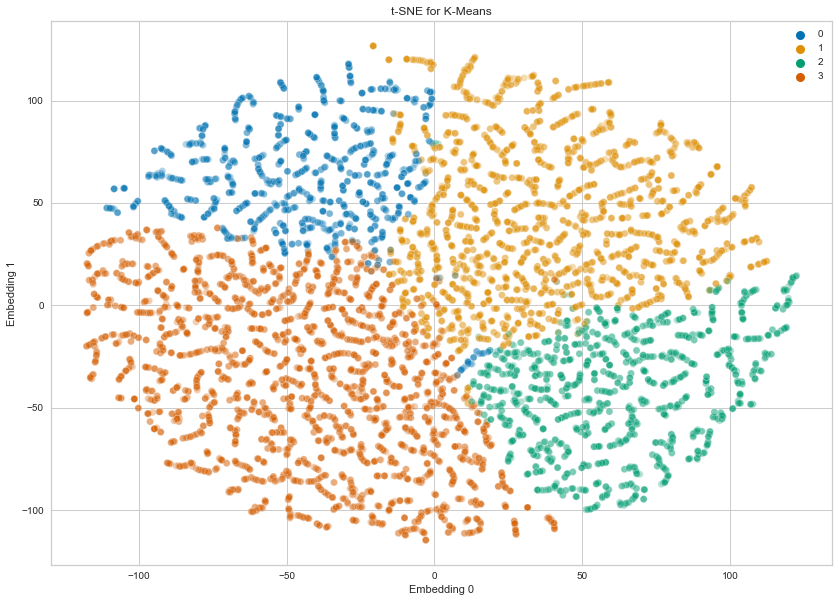

In [92]:
plot_tsne(embeddings=embeddings, labels=labels_2, title="t-SNE for K-Means")

**Interpretasi:** Terlihat bahwa klaster terbagi dengan baik berdasarkan kedekatan karakteristik antar setiap data untuk menjadi bagian dari suatu klaster.

In [93]:
df_with_labels = pd.concat([df, data_pca_kmeans['Cluster']], axis=1)

In [94]:
df_with_labels.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.166667,0.000000,0.000000,1000.0,201.802084,3
1,3202.467416,0.909091,0.00,0.00,0.0,0.000000,0.000000,0.250000,7000.0,4103.032597,3
2,2495.148862,1.000000,773.17,773.17,0.0,1.000000,1.000000,0.000000,7500.0,622.066742,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,0.083333,0.083333,0.083333,7500.0,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.083333,0.083333,0.000000,1200.0,678.334763,3


In [95]:
# mereset tampilan grafis
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

Memvisualisasikan jumlah data observasi untuk setiap klaster

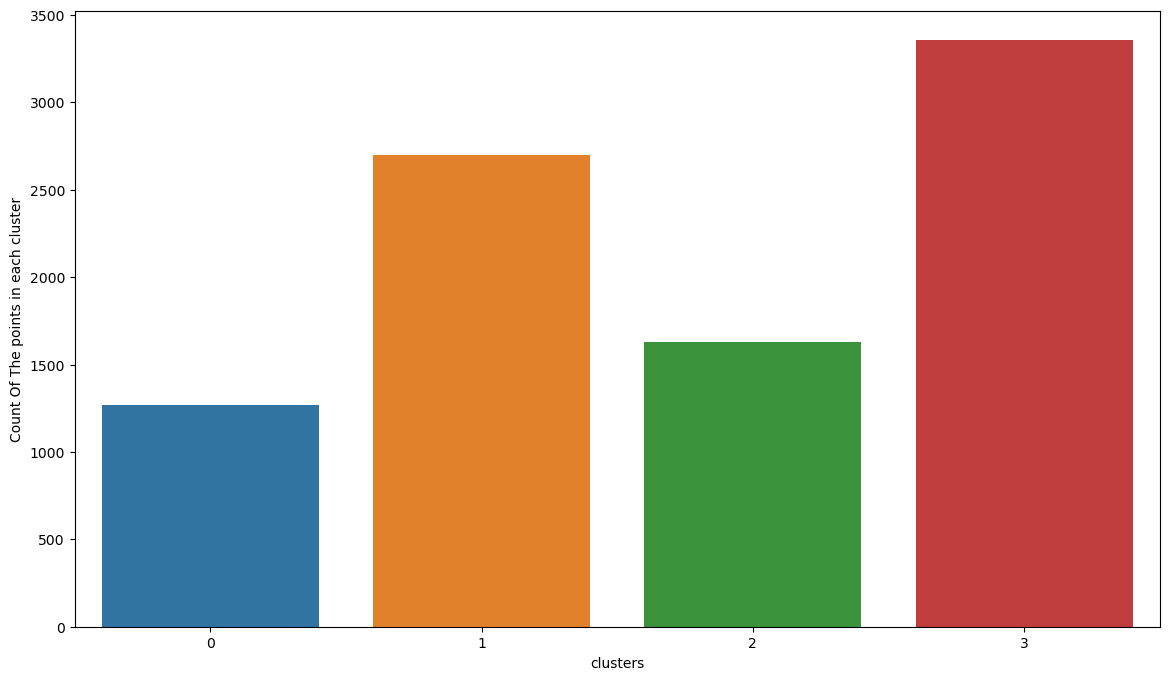

In [96]:
plt.figure(figsize=(14,8))
sns.countplot(labels_2)
plt.xlabel("clusters")
plt.ylabel("Count Of The points in each cluster")
plt.show()

<AxesSubplot:xlabel='PURCHASES', ylabel='PAYMENTS'>

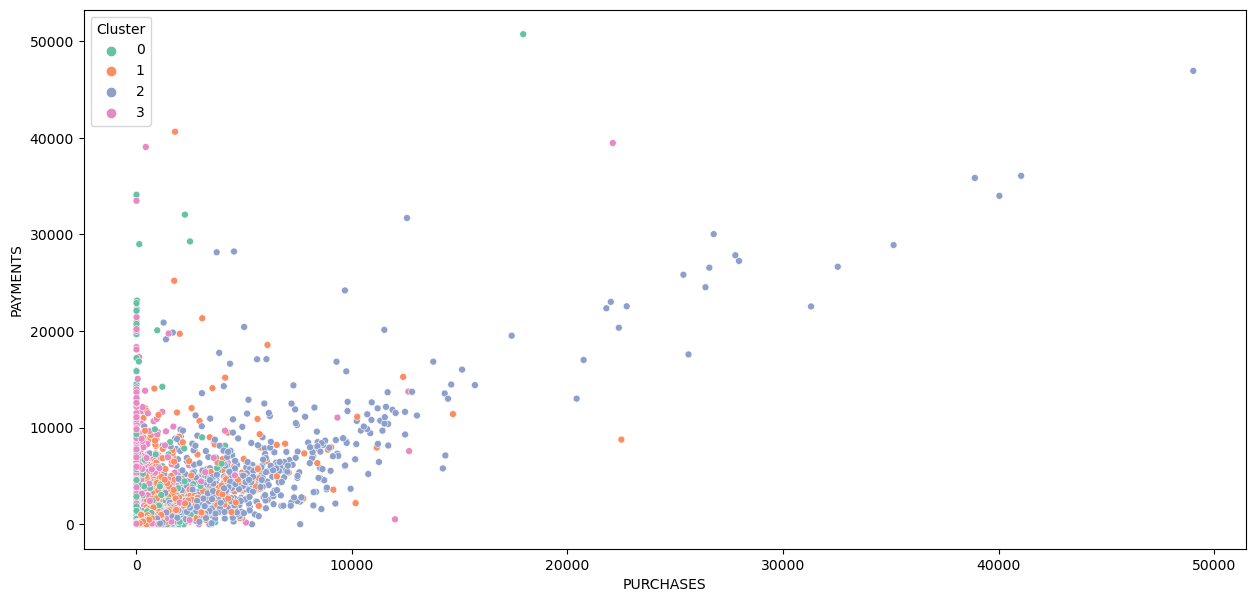

In [97]:
# scatter plot antara fitur PAYMENTS dengan PURCHASES

plt.figure(figsize=(15,7))
sns.scatterplot(data=df_with_labels, x='PURCHASES', y='PAYMENTS', hue = 'Cluster', s=25, palette="Set2")

### Memvisualisasikan data terkait perilaku pelanggan

In [98]:
purchase_various_segments = df_with_labels.iloc[:,[0,2,3,4,9,10]]

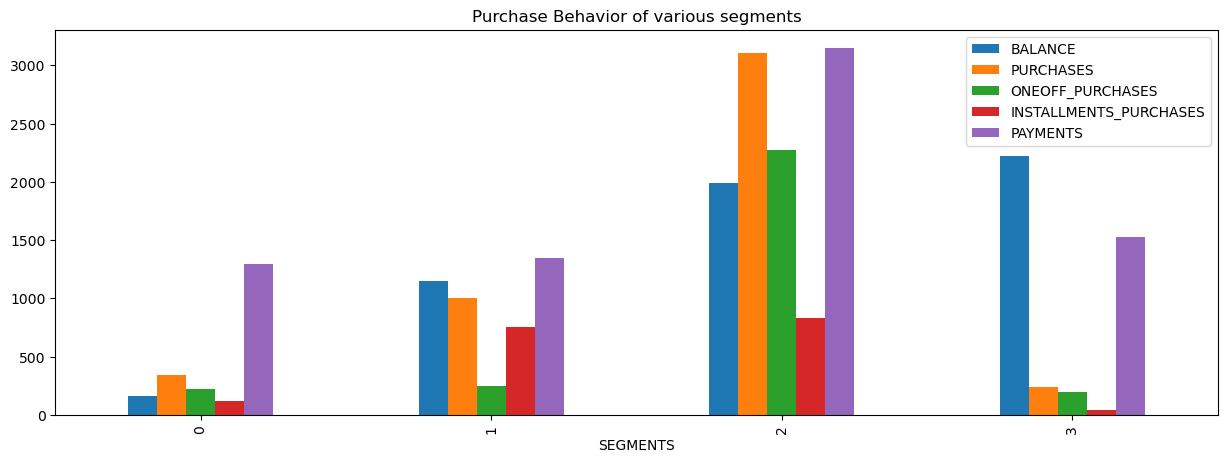

In [99]:
purchase_various_segments.groupby('Cluster').mean().plot.bar(figsize=(15, 5))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

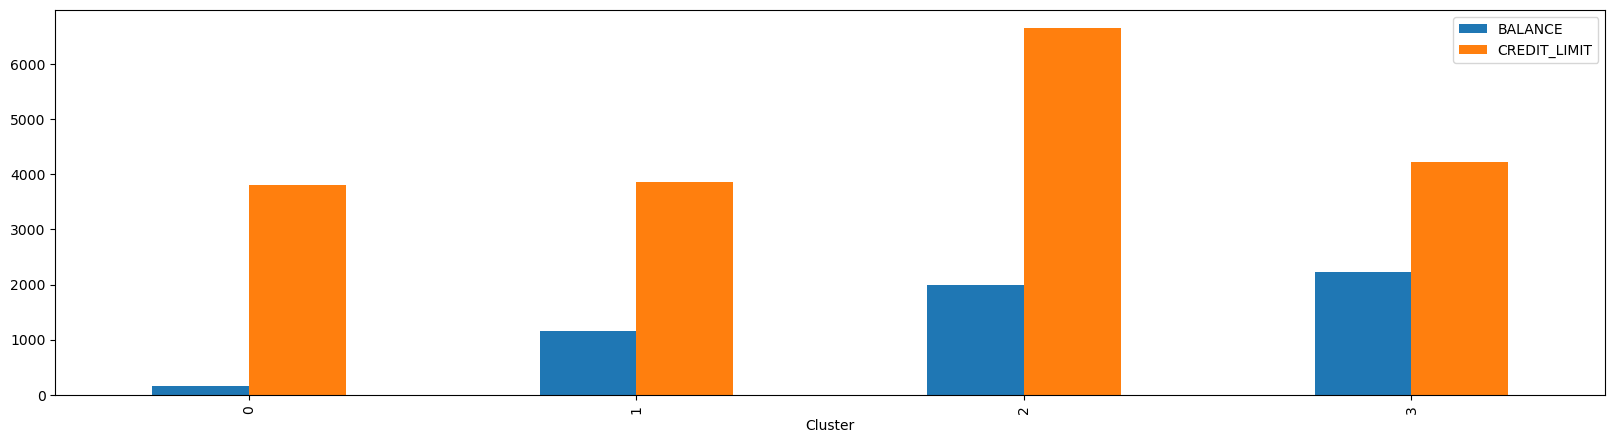

In [100]:
df_with_labels.groupby('Cluster')['BALANCE', 'CREDIT_LIMIT'].mean().plot(kind='bar', figsize=(20,5))
plt.show()

In [101]:
frequenct_various_segments = df_with_labels.iloc[:,[1,5,6,7,10]]

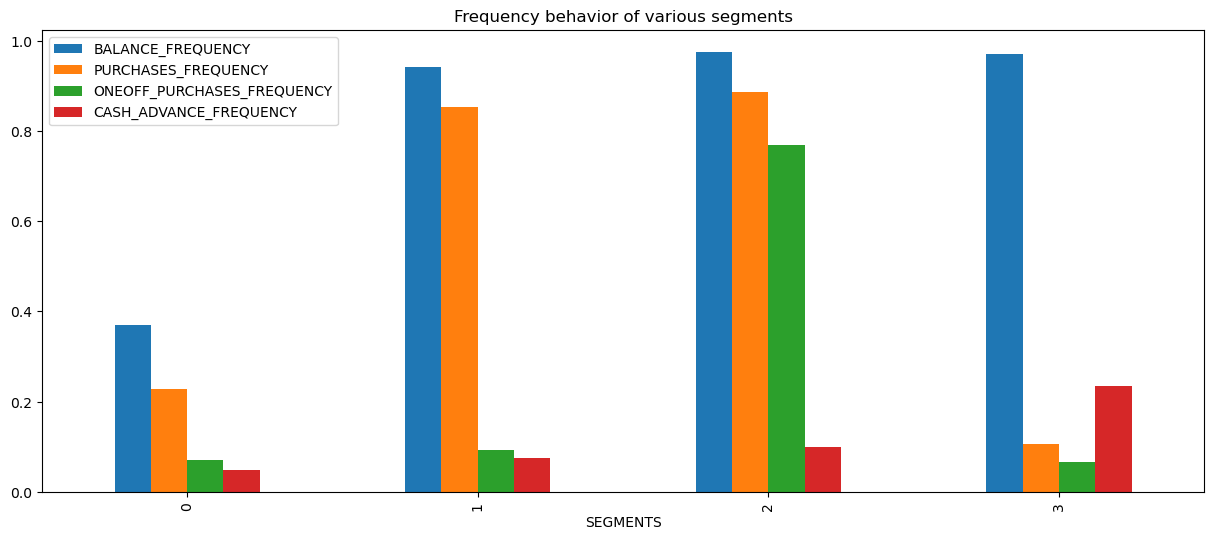

In [102]:
frequenct_various_segments.groupby('Cluster').mean().plot.bar(figsize=(15, 6))
plt.title('Frequency behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

Menampilkan distribusi data berdasarkan klaster

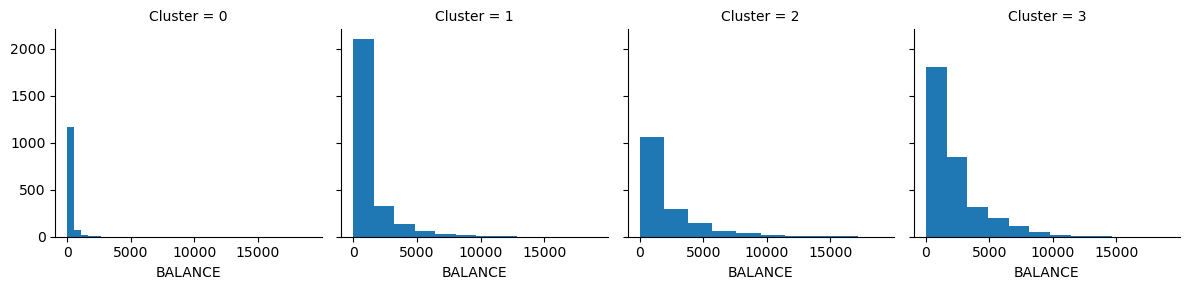

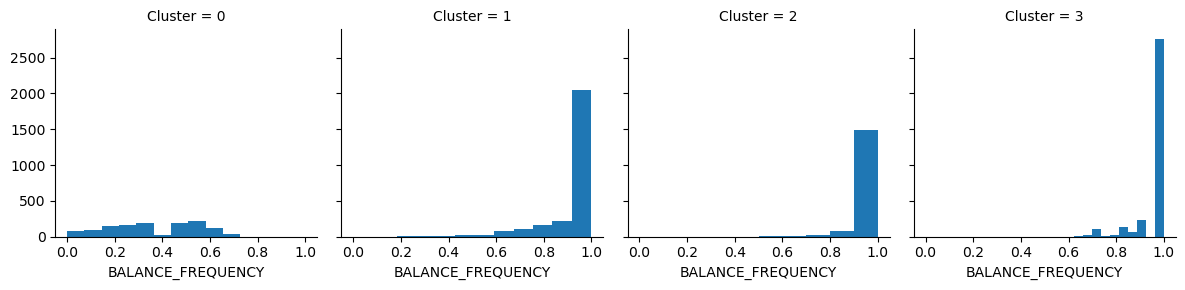

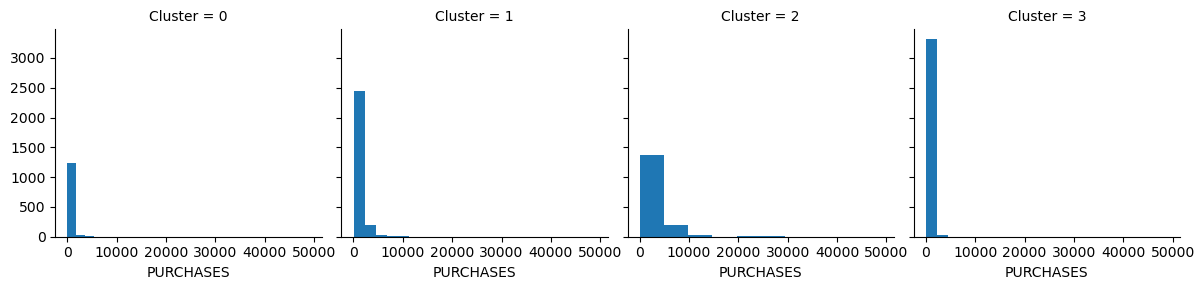

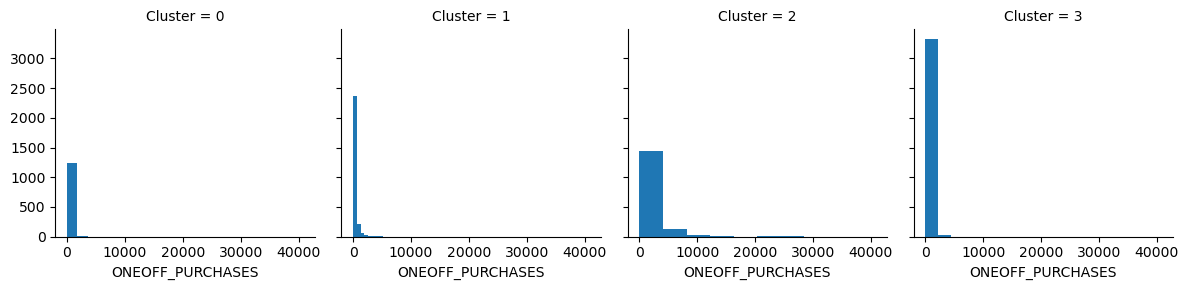

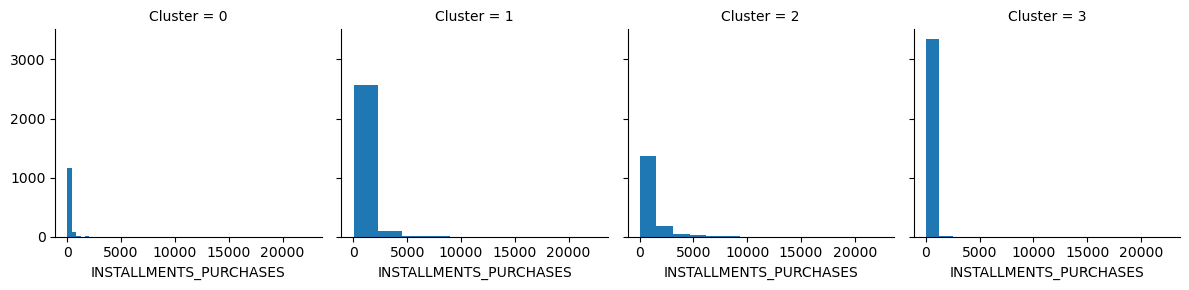

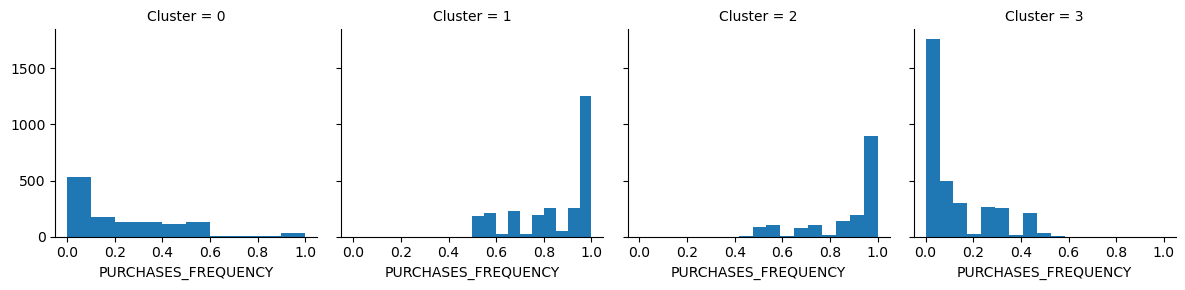

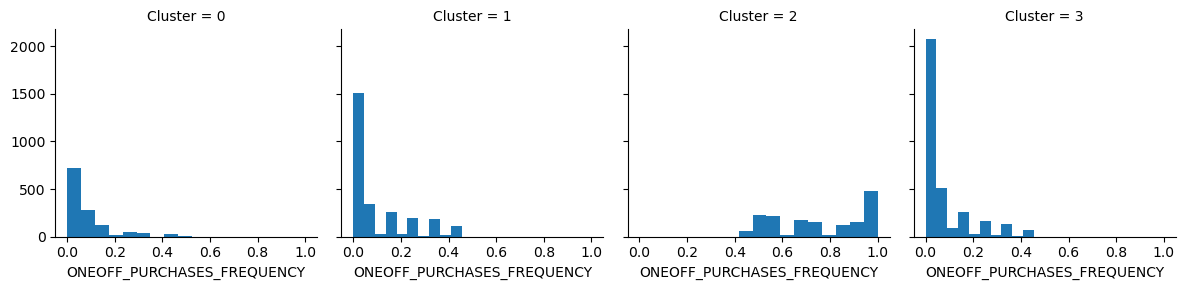

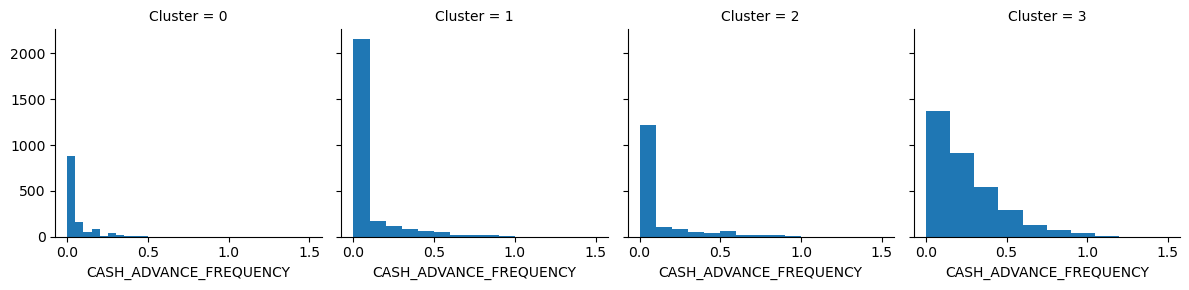

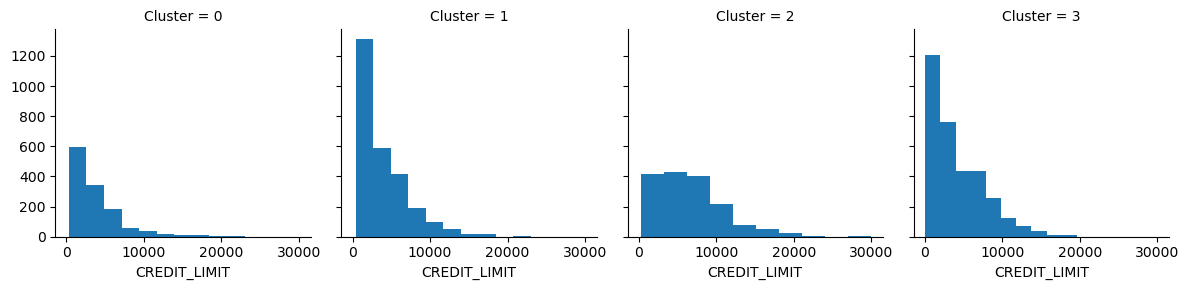

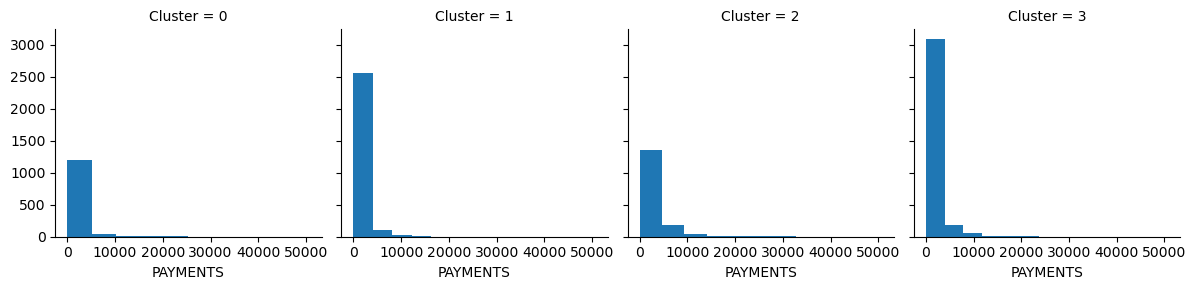

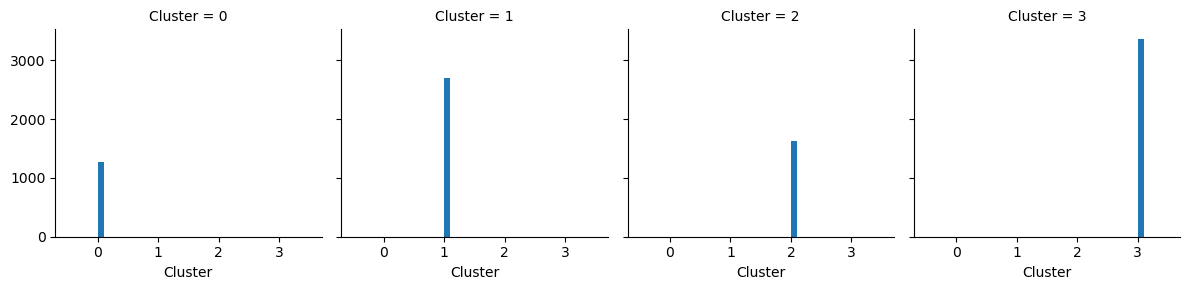

In [103]:
for i in df_with_labels:
    grid = sns.FacetGrid(df_with_labels, col='Cluster')
    grid.map(plt.hist, i)

## Analisis

**Klaster 1 (Medium Spenders)** <br>
Pelanggan dengan limit kredit rata-rata, saldo rendah dan mereka lebih memilih untuk langsung melakukan transaksi terhadap produk yang mereka butuhkan, jadi perusahaan harus menawarkan sistem pembayaran atau pinjaman dengan mencapai nominal tertentu agar memungkinan pelanggan mendapat diskon.

**Klaster 2 (Pay Later Purchasers)**: <br>
Orang-orang dengan limit kredit rata-rata dan saldo rata-rata untuk semua jenis transaksi, tetapi mereka lebih memilih melakukan pembayaran secara angsuran, jadi perusahaan harus menawarkan sistem cicilan yang lebih nyaman.


**Klaster 3 (Big Spenders):** <br>
Orang-orang kaya dan seimbang, sering melakukan pembelian dalam sekali jalan. Bahkan jika mereka memiliki saldo yang besar, mereka tetap menggunakan uang muka dalam jumlah besar untuk melakukan pembelian, yang artinya bahwa mereka membeli barang-barang mahal, jadi perusahaan harus menawarkan kepada mereka rencana di mana mereka mungkin meperoleh diskon untuk beberapa barang mahal dan juga banyak barang biasa untuk membuat mereka membeli lebih banyak. 


**Klaster 4 (Frugal Consumers)** <br>
Kelompok pelanggan ini memiliki frekuensi penggunaan kartu kredit yang rendah karena merupakan kelompok paling sedikit membeli, selain itu, mereka adalah pelanggan yang membayar secara efektif karena jumlah pembelian yang dilakukan cukup seimbang dengan pembelian maksimum dalam sekali jalan. Jadi perusahaan bisa menyediakan beberapa pilihan investasi, seperti tabungan berjangka, atau mengadakan hadiah untuk pelanggan yang beruntung, dengan menetapkan semakin banyak saldo tabungan, semakin besar peluang pelanggan tersebut untuk mendapatkan hadiah.

## Supervised Learning

In [104]:
data = df.copy()
X = data.iloc[:, :-1]

In [105]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,40.900749,0.818182,95.40,0.00,95.40,0.166667,0.000000,0.000000,1000.0,201.802084
1,3202.467416,0.909091,0.00,0.00,0.00,0.000000,0.000000,0.250000,7000.0,4103.032597
2,2495.148862,1.000000,773.17,773.17,0.00,1.000000,1.000000,0.000000,7500.0,622.066742
3,1666.670542,0.636364,1499.00,1499.00,0.00,0.083333,0.083333,0.083333,7500.0,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.083333,0.083333,0.000000,1200.0,678.334763
...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,1.000000,0.000000,0.000000,1000.0,325.594462
8945,19.183215,1.000000,300.00,0.00,300.00,1.000000,0.000000,0.000000,1000.0,275.861322
8946,23.398673,0.833333,144.40,0.00,144.40,0.833333,0.000000,0.000000,1000.0,81.270775
8947,13.457564,0.833333,0.00,0.00,0.00,0.000000,0.000000,0.166667,500.0,52.549959


In [106]:
scaler_2_inf = MinMaxScaler()
scaler_2_inf.fit(X)
minmax_scaler_inf = scaler_2_inf.transform(X)

minmax_scaler_df_inf = pd.DataFrame(minmax_scaler_inf, columns = X.columns)
minmax_scaler_df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.166667,0.000000,0.000000,0.031720
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.232053
2,0.131026,1.000000,0.015766,0.018968,0.000000,1.000000,1.000000,0.000000,0.248748
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.083333,0.083333,0.055555,0.248748
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.083333,0.083333,0.000000,0.038397
...,...,...,...,...,...,...,...,...,...
8944,0.001496,1.000000,0.005936,0.000000,0.012939,1.000000,0.000000,0.000000,0.031720
8945,0.001007,1.000000,0.006118,0.000000,0.013333,1.000000,0.000000,0.000000,0.031720
8946,0.001229,0.833333,0.002945,0.000000,0.006418,0.833333,0.000000,0.000000,0.031720
8947,0.000707,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.015025


In [107]:
pca2_inf = PCA(n_components=4, random_state=42)
pca_2_inf = pca2_inf.fit_transform(minmax_scaler_df_inf)
cumsum_pca_2_inf = np.cumsum(pca2_inf.explained_variance_ratio_)

PCA_2_inf = pd.DataFrame(data = pca_2_inf, columns = ['PC' + str(i) for i in range(1, 5)])

PCA_2_inf.head()

,PC1,PC2,PC3,PC4
0,-0.384144,0.067703,0.002081,-0.156582
1,-0.512878,-0.164260,-0.055847,0.079819
2,0.852234,-0.323458,0.295620,-0.046944
3,-0.435779,0.014353,0.205443,0.072370
4,-0.383169,-0.131401,-0.068549,-0.208742


In [108]:
PCA_2_inf_labels = pd.concat([PCA_2_inf, minmax_scaler_df['LABELS']], axis=1)

In [109]:
X = PCA_2_inf_labels.iloc[:, :-1]
y = PCA_2_inf_labels.iloc[:, -1]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [111]:
RF_Kmeans = RandomForestClassifier(random_state=42)
RF_Kmeans.fit(X_train, y_train)
y_pred = RF_Kmeans.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9932960893854749


Diperoleh akurasi 0.9944, sehingga model dapat memprediksi data baru untuk setiap klaster dengan baik.

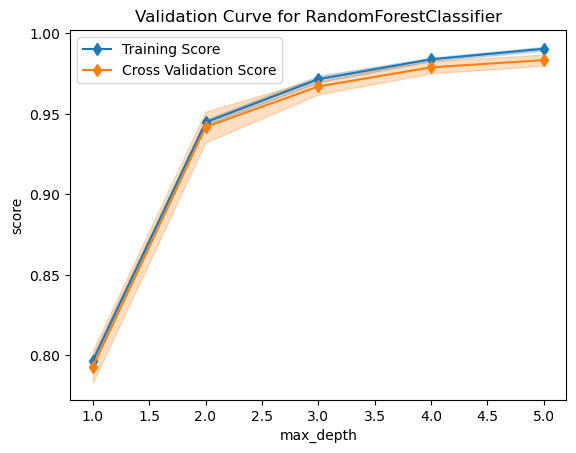

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10, estimator=RandomForestClassifier(random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([1, 2, 3, 4, 5]), scoring='accuracy')

In [112]:
validation_curve(RF_Kmeans, X_train, y_train, param_name="max_depth", n_jobs=-1,
                 param_range=np.arange(1, 6), cv=10, scoring="accuracy")

**Interpretasi :** Berdasarkan visualisasi di atas, terlihat bahwa Training Score dan Cross Validation Score tidak jauh berbeda. Maka model memiliki bias yang tidak terlalu tinggi ataupun rendah.

---
# J. Model Inference

In [113]:
new_data = {'BALANCE' : [8.061012, 4437.848144, 4659, 2329.48],
            'BALANCE_FREQUENCY' : [0.353636, 1.000000, 1.000000, 1.000000], 
            'PURCHASES' : [133.00, 1271.12, 10848.50, 216.34],
            'ONEOFF_PURCHASES' : [0.00, 351.54, 8108.00, 214.34],
            'INSTALLMENTS_PURCHASES' : [121.00, 917.58, 2640.50, 0.0],
            'PURCHASES_FREQUENCY' : [0.250000, 0.863333, 1.000000, 0.250000], 
            'ONEOFF_PURCHASES_FREQUENCY' : [0.00, 0.20, 0.666667, 0.230000],
            'CASH_ADVANCE_FREQUENCY' : [0.00, 0.00, 0.000000, 0],
            'CREDIT_LIMIT' : [3000, 4000, 7400.0, 2400], 
            'PAYMENTS' : [133.612720, 1406.03, 8423.715495, 0.00]}
new_data = pd.DataFrame(new_data)

In [114]:
new_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS
0,8.061012,0.353636,133.00,0.00,121.00,0.250000,0.000000,0.0,3000.0,133.612720
1,4437.848144,1.000000,1271.12,351.54,917.58,0.863333,0.200000,0.0,4000.0,1406.030000
2,4659.000000,1.000000,10848.50,8108.00,2640.50,1.000000,0.666667,0.0,7400.0,8423.715495
3,2329.480000,1.000000,216.34,214.34,0.00,0.250000,0.230000,0.0,2400.0,0.000000


In [115]:
X = df_with_labels.iloc[:, :-1]
y = df_with_labels.iloc[:, -1]

In [116]:
df_with_labels

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.166667,0.000000,0.000000,1000.0,201.802084,3
1,3202.467416,0.909091,0.00,0.00,0.00,0.000000,0.000000,0.250000,7000.0,4103.032597,3
2,2495.148862,1.000000,773.17,773.17,0.00,1.000000,1.000000,0.000000,7500.0,622.066742,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,0.083333,0.083333,0.083333,7500.0,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.00,0.083333,0.083333,0.000000,1200.0,678.334763,3
...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,1.000000,0.000000,0.000000,1000.0,325.594462,1
8945,19.183215,1.000000,300.00,0.00,300.00,1.000000,0.000000,0.000000,1000.0,275.861322,1
8946,23.398673,0.833333,144.40,0.00,144.40,0.833333,0.000000,0.000000,1000.0,81.270775,1
8947,13.457564,0.833333,0.00,0.00,0.00,0.000000,0.000000,0.166667,500.0,52.549959,3


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [118]:
RF_Kmeans = RandomForestClassifier(random_state=42)
RF_Kmeans.fit(X_train, y_train)
y_pred = RF_Kmeans.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9899441340782122


In [119]:
y_pred_new1 = RF_Kmeans.predict(new_data)
print(f"Hasil prediksi: {y_pred_new1}")

Hasil prediksi: [0 1 2 3]


---
# K. Kesimpulan

Berdasarkan pengolahan analisis data yang telah dilakukan, diperoleh kesimpulan bahwa:
1. Banyak pengguna kartu kredit ingin menjaga saldo tetap rendah untuk memanfaatkan kredit mereka. Kemungkinan bagi banyak orang, kartu kredit adalah alat untuk pemanfaatan kredit daripada alat belanja.
2. Banyak pengguna yang melunasi kredit di bulan ke-12. Karena semakin lama masa kredit, semakin banyak tingkat bunga yang dibayarkan. Tetapi juga semakin banyak waktu yang harus dibayar dan tampaknya menjadi pilihan yang diinginkan orang.
3. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan, menggunakan 10 atribut berdasarkan pemilihan fitur.
4. Metode Clustering yang digunakan dalam proyek ini yaitu K-Means Clustering dengan menghasilkan nilai evaluasi Silhouette Score bernilai 0.473826 dan Davis-Bouldin Index bernilai 0.819113.
5. Mereduksi dimensi menggunakan PCA menghasilkan 4 kompenen utama yang menampung 93,77% variansi dari data.
6. Menggunakan K-means Clustering, pengelompokkan dibagi menjadi 4 klaster dengan karakteristik sebagai berikut:
> Klaster 0 (Medium Spenders): Pelanggan dengan dengan limit kredit rata-rata, saldo rendah, dan pembayaran tinggi. <br>
> Klaster 1 (Pay Later Purchasers): Pengguna dengan limit kredit rata-rata, saldo rata-rata, dan menggunakannya untuk pembayaran secara angsuran. <br>
> Klaster 2 (Big Spenders): Pengguna dengan limit kredit paling tinggi, pembelian tinggi, dan sebagian besar menggunakannya untuk satu kali transaksi. <br>
> Klaster 3 (Frugal Consumers): Pengguna dengan limit kredit tinggi, saldo paling tinggi dan tidak banyak melakukan transaksi. <br>
7. Model Random Forest menjadi algoritma yang digunakan untuk melakukan prediksi data baru dalam memasarkan kartu kredit berdasarkan 4 klaster yang telah di analisis.

---

In [120]:
pickle.dump(scaler_2, open('minmax_scaler.pkl', 'wb'))
pickle.dump(pca2, open('pca_minmax.pkl', 'wb'))
pickle.dump(RF_Kmeans, open('rf_kmeans.pkl', 'wb'))